# * Predicting bad loans*
<i>Author : Vinitha Palani</i><br>
<i>Date   : June 1st, 2017<i><br>

## Table of contents <a id='Table-of-contents'></a>

1. [Problem Definition](#Problem)

2. [Required libraries](#Required-libraries)

3. [Load data](#Load-data)

4. [Data Cleanup](#cleanup)
    
5. [Checking the data](#Checking-the-data)
    - [Peek at your Data](#Peek)
    - [Class Distribution](#Class-dist)
    - [Numeric Features](#distribution of numerical feature)
    - [Categorical Features](#distribution of catego feature)
    - [Takeaway](#Takeaway1)
    
6. [Exploratory Data analysis](#EDA)
    - [Univariate Analysis](#EDA)
    - [Takeaway](#Takeaway2)
    - [Multivariate Analysis](#Multivariate)
    - [Takeaway](#Takeaway3)

7. [Remove Features](#Feature1)

8. [Train-Test split](#split)

9. [Feature Engineering](#Feature)
    - [Convert catagorical variables](#Feature2)
  
10. [Feature Selection](#Feature-Selection)

11. [Algorithm Evaluation With Resampling Methods](#Resampling)

12. [Things I skipped..](#skip)

13. [Acknowledgements](#Acknowledgement)


<a id='Problem'></a>

# Problem Definition

[[ go back to the top ]](#Table-of-contents)

This is a binary classification problem .The objective is to predict whether a loan will be "bad"  ( the borrower will default) or "good" (it will be paid off ) . This will be a supervised learning problem and models will be trained and tested from data from LendingClub who is the leader of America's P2P(Peer to Peer) lending industry .
LendingClub makes several datasets available on their website. I will be using 2015 data.<br>
Data
https://www.lendingclub.com/info/download-data.action

<a id='#Required-libraries'></a>

# Required Libraries

[[ go back to the top ]](#Table-of-contents)

In [1]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib.pyplot as plt
#print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas as pd
print('pandas: {}'.format(pd.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))
import seaborn as sns
print('seaborn: {}'.format(sns.__version__))
%matplotlib inline

Python: 3.5.2 |Anaconda custom (64-bit)| (default, Jul  5 2016, 11:41:13) [MSC v.1900 64 bit (AMD64)]
scipy: 0.18.1
numpy: 1.11.3
pandas: 0.18.1
sklearn: 0.18.1
seaborn: 0.7.1


<a id='#Load-data'></a>

# Load data

[[ go back to the top ]](#Table-of-contents)


In [2]:
LoanStats = pd.read_csv('data/LoanStats3d/LoanStats3d.csv')

C:\Users\Vini\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0,1,2,3,4,7,13,18,19,24,25,27,28,29,30,31,32,34,36,37,38,39,40,41,42,43,44,46,49,50,51,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
LoanStats.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 421098 entries, (id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, url, desc, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d, collections_12_mths_ex_med, mths_since_last_major_derog, policy_code, application_type, annual_inc_joint, dti_joint, verification_status_joint, acc_now_delinq, tot_coll_amt, tot_cur_bal, open_acc_6m, open_il_6m, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12

In [6]:
LoanStats.head()

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
id  member_id loan_amnt funded_amnt funded_amnt_inv term       int_rate installment grade sub_grade emp_title            emp_length home_ownership annual_inc verification_status issue_d  loan_status pymnt_plan url desc purpose            title              zip_code addr_state dti   delinq_2yrs earliest_cr_line inq_last_6mths mths_since_last_delinq mths_since_last_record open_acc pub_rec revol_bal revol_util total_acc initial_list_status out_prncp out_prncp_inv total_pymnt      total_pymnt_inv total_rec_prncp total_rec_int total_rec_late_fee recoveries collection_recovery_fee last_pymnt_d last_pymnt_amnt next_pymnt_d last_credit_pull_d collections_12_mths_ex_med mths_since_last_major_derog policy_code application_type annual_inc_joint dti_joint verification_status_joint acc_now_delinq tot_coll_amt tot_cur_bal open_acc_6m open_il_6m open_il_12m open_il_24m mths_since_rcnt_il total_bal_il il_util open_rv_12m open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m acc_open_past_24mths avg_cur_bal bc_open_to_buy bc_util chargeoff_within_12_mths delinq_amnt mo_sin_old_il_acct mo_sin_old_rev_tl_op mo_sin_rcnt_rev_tl_op mo_sin_rcnt_tl mort_acc mths_since_recent_bc mths_since_recent_bc_dlq mths_since_recent_inq mths_since_recent_revol_delinq num_accts_ever_120_pd num_actv_bc_tl num_actv_rev_tl num_bc_sats num_bc_tl num_il_tl num_op_rev_tl num_rev_accts num_rev_tl_bal_gt_0 num_sats num_tl_120dpd_2m num_tl_30dpd num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq percent_bc_gt_75 pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit total_il_high_credit_limit revol_bal_joint sec_app_earliest_cr_line sec_app_inq_last_6mths sec_app_mort_acc sec_app_open_acc sec_app_revol_util sec_app_open_il_6m sec_app_num_rev_accts sec_app_chargeoff_within_12_mths sec_app_collections_12_mths_ex_med                sec_app_mths_since_last_major_derog                              
NaN NaN       3600      3600        3600             36 months  13.99%  123.03      C     C4        leadman              10+ years  MORTGAGE       55000      Not Verified        Dec-2015 Current     n          NaN NaN  debt_consolidation Debt consolidation 190xx    PA         5.91  0           Aug-2003         1              30                     NaN                    7        0       2765      29.7%      13        w                   2183.23   2183.23       1961.48          1961.48         1416.77         544.71        0.0                0.0        0.0                     May-2017     123.03          Jun-2017     May-2017           0                          30                          1           INDIVIDUAL       NaN              NaN       NaN                       0              722          144904      2           2          0           1           21                 4981         36      3           3           722        34       9300             3      1           4            4                    20701       1506           37.2    0                        0           148                128                  3                     3              1        4                    69                       4                     69                             2                     2              4               2           5         3         4             9             4                   7        0                0            0                  3                  76.9           0                0                    0         178050          7746              2400           13734                      NaN             NaN                      NaN                    NaN              NaN              NaN                NaN                NaN                   NaN                              NaN                                                                               NaN                              
              20000     20000       20000          

In [3]:
LoanStats = LoanStats.reset_index()
LoanStats

,level_0,level_1,level_2,level_3,level_4,level_5,level_6,level_7,level_8,level_9,...,level_112,level_113,level_114,level_115,level_116,level_117,level_118,level_119,level_120,Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_il_6m,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
1,NaN,NaN,3600,3600,3600,36 months,13.99%,123.03,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,20000,20000,20000,60 months,10.78%,432.66,B,B4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,29900,29900,29900,60 months,12.88%,678.49,C,C2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,8650,8650,8650,36 months,19.89%,320.99,E,E3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,18000,18000,18000,60 months,11.99%,400.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,10400,10400,10400,60 months,22.45%,289.91,F,F1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,35000,35000,35000,60 months,14.85%,829.9,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,24700,24700,24700,36 months,11.99%,820.28,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,18000,18000,18000,60 months,19.48%,471.7,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
LoanStats.columns = list(LoanStats.iloc[0].values)
LoanStats.drop(LoanStats.index[0], inplace=True)
LoanStats.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_il_6m,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
1,NaN,NaN,3600,3600,3600,36 months,13.99%,123.03,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,20000,20000,20000,60 months,10.78%,432.66,B,B4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,29900,29900,29900,60 months,12.88%,678.49,C,C2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,8650,8650,8650,36 months,19.89%,320.99,E,E3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,18000,18000,18000,60 months,11.99%,400.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
LoanStats.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_il_6m,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
421093,NaN,NaN,13000,13000,13000,60 months,15.99%,316.07,D,D2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421094,NaN,NaN,12000,12000,12000,60 months,19.99%,317.86,E,E3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421095,NaN,NaN,20000,20000,20000,36 months,11.99%,664.2,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421096,Total amount funded in policy code 1: 6417608175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421097,Total amount funded in policy code 2: 1944088810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
LoanStats.drop(LoanStats.tail(2).index, inplace=True)

In [8]:
LoanStats.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_il_6m,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
421091,NaN,NaN,24000,24000,24000,36 months,11.99%,797.03,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421092,NaN,NaN,10000,10000,10000,36 months,11.99%,332.1,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421093,NaN,NaN,13000,13000,13000,60 months,15.99%,316.07,D,D2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421094,NaN,NaN,12000,12000,12000,60 months,19.99%,317.86,E,E3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421095,NaN,NaN,20000,20000,20000,36 months,11.99%,664.2,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a id='#cleanup'></a>

# Data Cleanup

[[ go back to the top ]](#Table-of-contents)<br>


In [6]:
#Drop the columns where all elements are nan.
LoanStats.dropna(axis=1, how='all', inplace=True)

In [10]:
LoanStats

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
1,3600,3600,3600,36 months,13.99%,123.03,C,C4,leadman,10+ years,...,0,3,76.9,0,0,0,178050,7746,2400,13734
2,20000,20000,20000,60 months,10.78%,432.66,B,B4,truck driver,10+ years,...,0,0,100,50,0,0,218418,18696,6200,14877
3,29900,29900,29900,60 months,12.88%,678.49,C,C2,Corporate Insurance,10+ years,...,0,4,100,25,0,0,271700,42497,34000,15574
4,8650,8650,8650,36 months,19.89%,320.99,E,E3,Program Coordinator,8 years,...,0,12,100,50,1,0,38998,18926,2750,18248
5,18000,18000,18000,60 months,11.99%,400.31,C,C1,GS-11,10+ years,...,0,4,100,0,0,0,309710,36127,69800,26210
6,10400,10400,10400,60 months,22.45%,289.91,F,F1,Contract Specialist,3 years,...,0,4,96.6,60,0,0,439570,95768,20300,88097
7,35000,35000,35000,60 months,14.85%,829.9,C,C5,Information Systems Officer,10+ years,...,0,1,100,0,0,0,381215,52226,62500,18000
8,24700,24700,24700,36 months,11.99%,820.28,C,C1,Engineer,10+ years,...,0,2,97.4,7.7,0,0,314017,39475,79300,24667
9,18000,18000,18000,60 months,19.48%,471.7,E,E2,Software Manager,7 years,...,0,3,100,14.3,1,0,65819,36247,10300,31319
10,20000,20000,20000,36 months,8.49%,631.26,B,B1,road driver,10+ years,...,1,0,93.3,0,0,0,193390,27937,14500,36144


In [7]:
LoanStats1 = LoanStats.copy()

In [12]:
LoanStats.shape

(421095, 108)

In [8]:
#count the number of non-NaN values if that constitutes less than 20 percent delete the column
sparse_columns = [index for (index,count) in enumerate(LoanStats.count()) if count < (LoanStats.shape[0]*0.2)]
LoanStats.count()[sparse_columns] 

desc                            45
mths_since_last_record       74415
annual_inc_joint               511
dti_joint                      509
verification_status_joint      511
open_acc_6m                  21372
open_il_6m                   21372
open_il_12m                  21372
open_il_24m                  21372
mths_since_rcnt_il           20810
total_bal_il                 21372
il_util                      18617
open_rv_12m                  21372
open_rv_24m                  21372
max_bal_bc                   21372
all_util                     21372
inq_fi                       21372
total_cu_tl                  21372
inq_last_12m                 21372
dtype: int64

In [9]:
LoanStats.drop(LoanStats.count()[sparse_columns].index.values, axis=1, inplace=True)

<a id='#Checking-the-data'></a>

# Checking the data

[[ go back to the top ]](#Table-of-contents)


<a id='#Peek'></a>

###  Peek at the data

[[ go back to the top ]](#Table-of-contents) <br>


In [15]:
LoanStats.describe(include='all').T 

,count,unique,top,freq
loan_amnt,421095,2196,10000,28280
funded_amnt,421095,2196,10000,28280
funded_amnt_inv,421095,2239,10000,26899
term,421095,2,36 months,283173
int_rate,421095,111,7.89%,20307
installment,421095,42676,312.86,1609
grade,421095,7,C,120567
sub_grade,421095,35,C1,26434
emp_title,397221,120812,Teacher,8070
emp_length,421095,12,10+ years,141521


In [23]:
#"loan_status" looks like the target column
LoanStats['loan_status'].value_counts()

Current               249912
Fully Paid            116036
Charged Off            41594
Late (31-120 days)      7791
In Grace Period         3844
Late (16-30 days)       1906
Default                   12
Name: loan_status, dtype: int64

In [10]:
#When the Loan Status is 'Current' we are not sure if the loan will be paid or not
LoanStats = LoanStats[LoanStats['loan_status'] != 'Current']
LoanStats['loan_status'].value_counts()

Fully Paid            116036
Charged Off            41594
Late (31-120 days)      7791
In Grace Period         3844
Late (16-30 days)       1906
Default                   12
Name: loan_status, dtype: int64

In [11]:
#When the Loan Status is 'Late (16-30 days)' or 'Late (31-120 days)' or 'In Grace Period' --these also sit on the fence hence 
#should also be excluded.
LoanStats = LoanStats[LoanStats['loan_status'].isin(['Default', 'Charged Off','Fully Paid'])]
LoanStats['loan_status'].value_counts()

Fully Paid     116036
Charged Off     41594
Default            12
Name: loan_status, dtype: int64

In [12]:
# from https://help.lendingclub.com/hc/en-us/articles/215488038
#'Default', 'Charged Off' ---> bad-loan (Class 1)
#'Fully Paid'             ---> good-loan (Class 0)
bad_loans = ['Default', 'Charged Off']
LoanStats['class'] = [1 if x in bad_loans else 0 for x in LoanStats['loan_status']]

In [19]:
LoanStats[['loan_status','class']]

,loan_status,class
3,Fully Paid,0
4,Fully Paid,0
5,Fully Paid,0
6,Fully Paid,0
8,Fully Paid,0
10,Fully Paid,0
11,Fully Paid,0
12,Fully Paid,0
13,Fully Paid,0
16,Fully Paid,0


In [13]:
LoanStats.drop('loan_status', axis=1, inplace=True)

In [21]:
LoanStats

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,class
3,29900,29900,29900,60 months,12.88%,678.49,C,C2,Corporate Insurance,10+ years,...,4,100,25,0,0,271700,42497,34000,15574,0
4,8650,8650,8650,36 months,19.89%,320.99,E,E3,Program Coordinator,8 years,...,12,100,50,1,0,38998,18926,2750,18248,0
5,18000,18000,18000,60 months,11.99%,400.31,C,C1,GS-11,10+ years,...,4,100,0,0,0,309710,36127,69800,26210,0
6,10400,10400,10400,60 months,22.45%,289.91,F,F1,Contract Specialist,3 years,...,4,96.6,60,0,0,439570,95768,20300,88097,0
8,24700,24700,24700,36 months,11.99%,820.28,C,C1,Engineer,10+ years,...,2,97.4,7.7,0,0,314017,39475,79300,24667,0
10,20000,20000,20000,36 months,8.49%,631.26,B,B1,road driver,10+ years,...,0,93.3,0,0,0,193390,27937,14500,36144,0
11,20000,20000,20000,36 months,9.17%,637.58,B,B2,Vice President of Recruiting Operations,10+ years,...,2,96.3,100,0,0,388852,116762,31500,46452,0
12,1400,1400,1400,36 months,12.88%,47.1,C,C2,Logistics Manager,3 years,...,1,100,75,0,0,372109,75258,34500,55501,0
13,8000,8000,8000,36 months,11.48%,263.74,B,B5,Vendor liaison,10+ years,...,2,94.4,33.3,0,0,256513,113782,17000,135513,0
16,11950,11950,11950,36 months,13.44%,405.18,C,C3,Veterinary Tecnician,4 years,...,0,100,100,0,0,16900,12798,9400,4000,0


<a id='#Class-dist'></a>

###  Class Distribution

[[ go back to the top ]](#Table-of-contents)
class_counts = df.groupby('class').size() <br>
Classification problems with imbalance classes require special treatment<br>

In [14]:
class_counts = LoanStats.groupby('class').size() 
class_counts

class
0    116036
1     41606
dtype: int64

In [15]:
print("class 0  : {0:0.2f}%".format((class_counts[0]/(class_counts[0]+class_counts[1]))*100))
print("class 1  : {0:0.2f}%".format((class_counts[1]/(class_counts[0]+class_counts[1]))*100))

class 0  : 73.61%
class 1  : 26.39%


Ok..now this makes this a classification problem with imbalanced classes

<a id='#distribution of numerical feature'></a>

###  Numerical features 

[[ go back to the top ]](#Table-of-contents)
 <br>

In [49]:
LoanStats.describe(include='all').T 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
loan_amnt,157642,1822,10000,10287,NaN,NaN,NaN,NaN,NaN,NaN,NaN
funded_amnt,157642,1822,10000,10287,NaN,NaN,NaN,NaN,NaN,NaN,NaN
funded_amnt_inv,157642,1850,10000,9793,NaN,NaN,NaN,NaN,NaN,NaN,NaN
term,157642,2,36 months,111658,NaN,NaN,NaN,NaN,NaN,NaN,NaN
int_rate,157642,109,12.69%,6896,NaN,NaN,NaN,NaN,NaN,NaN,NaN
installment,157642,27686,318.79,536,NaN,NaN,NaN,NaN,NaN,NaN,NaN
grade,157642,7,C,45292,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub_grade,157642,35,C1,9592,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_title,149313,55162,Teacher,2632,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_length,157642,12,10+ years,51686,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
LoanStats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157642 entries, 3 to 421094
Data columns (total 89 columns):
loan_amnt                         157642 non-null object
funded_amnt                       157642 non-null object
funded_amnt_inv                   157642 non-null object
term                              157642 non-null object
int_rate                          157642 non-null object
installment                       157642 non-null object
grade                             157642 non-null object
sub_grade                         157642 non-null object
emp_title                         149313 non-null object
emp_length                        157642 non-null object
home_ownership                    157642 non-null object
annual_inc                        157642 non-null object
verification_status               157642 non-null object
issue_d                           157642 non-null object
pymnt_plan                        157642 non-null object
purpose                           

In [16]:
LoanStats2 = LoanStats.copy()
LoanStats = LoanStats.apply(pd.to_numeric, errors="ignore")

In [112]:
LoanStats.describe().T 

C:\Users\Vini\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,count,mean,std,min,25%,50%,75%,max
loan_amnt,171183.0,14992.108883,8604.937928,1.000000e+03,8000.000,13275.00,20000.00000,3.500000e+04
funded_amnt,171183.0,14992.108883,8604.937928,1.000000e+03,8000.000,13275.00,20000.00000,3.500000e+04
funded_amnt_inv,171183.0,14985.883640,8601.284339,9.000000e+02,8000.000,13275.00,20000.00000,3.500000e+04
installment,171183.0,445.306395,252.270527,1.401000e+01,261.880,385.97,588.26000,1.445460e+03
annual_inc,171183.0,76499.661090,71433.664905,0.000000e+00,46500.000,65000.00,90900.00000,8.900060e+06
dti,171183.0,19.065844,35.215246,0.000000e+00,12.400,18.42,25.13000,9.999000e+03
delinq_2yrs,171183.0,0.342219,0.934702,0.000000e+00,0.000,0.00,0.00000,3.900000e+01
inq_last_6mths,171183.0,0.659645,0.934504,0.000000e+00,0.000,0.00,1.00000,6.000000e+00
mths_since_last_delinq,88904.0,34.694693,22.150117,0.000000e+00,NaN,NaN,NaN,1.760000e+02
open_acc,171183.0,11.983772,5.600652,1.000000e+00,8.000,11.00,15.00000,9.000000e+01


In [52]:
#what is with these 
LoanStats.describe().T[LoanStats.describe().T.apply(pd.isnull,axis=0).any(axis=1)] 

C:\Users\Vini\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,count,mean,std,min,25%,50%,75%,max
mths_since_last_delinq,81378.0,34.812591,22.153887,0.0,NaN,NaN,NaN,176.0
mths_since_last_major_derog,47596.0,45.760631,22.536548,0.0,NaN,NaN,NaN,176.0
bc_open_to_buy,155981.0,9816.752739,14956.256609,0.0,NaN,NaN,NaN,559912.0
bc_util,155869.0,59.813817,28.518563,0.0,NaN,NaN,NaN,243.8
mo_sin_old_il_acct,153656.0,125.425730,51.616306,0.0,NaN,NaN,NaN,724.0
mths_since_recent_bc,156055.0,22.273295,29.560915,0.0,NaN,NaN,NaN,611.0
mths_since_recent_bc_dlq,41119.0,40.939298,23.070787,0.0,NaN,NaN,NaN,176.0
mths_since_recent_inq,144635.0,6.240619,5.682591,0.0,NaN,NaN,NaN,25.0
mths_since_recent_revol_delinq,56843.0,36.786095,22.832927,0.0,NaN,NaN,NaN,176.0
num_rev_accts,157641.0,15.277853,8.451382,2.0,NaN,NaN,NaN,102.0


In [53]:
feat_withnull_n = LoanStats.describe().T[LoanStats.describe().T.apply(pd.isnull,axis=0).any(axis=1)].index.values
LoanStats[feat_withnull_n].isnull().sum()

C:\Users\Vini\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


mths_since_last_delinq             76264
mths_since_last_major_derog       110046
bc_open_to_buy                      1661
bc_util                             1773
mo_sin_old_il_acct                  3986
mths_since_recent_bc                1587
mths_since_recent_bc_dlq          116523
mths_since_recent_inq              13007
mths_since_recent_revol_delinq    100799
num_rev_accts                          1
num_tl_120dpd_2m                    7270
percent_bc_gt_75                    1776
dtype: int64

In [17]:
# lets delete the one row with num_rev_accts = NaN  
LoanStats.dropna(subset=["num_rev_accts"], inplace=True)
LoanStats

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,class
3,29900,29900,29900.0,60 months,12.88%,678.49,C,C2,Corporate Insurance,10+ years,...,4,100.0,25.0,0,0,271700.0,42497.0,34000.0,15574.0,0
4,8650,8650,8650.0,36 months,19.89%,320.99,E,E3,Program Coordinator,8 years,...,12,100.0,50.0,1,0,38998.0,18926.0,2750.0,18248.0,0
5,18000,18000,18000.0,60 months,11.99%,400.31,C,C1,GS-11,10+ years,...,4,100.0,0.0,0,0,309710.0,36127.0,69800.0,26210.0,0
6,10400,10400,10400.0,60 months,22.45%,289.91,F,F1,Contract Specialist,3 years,...,4,96.6,60.0,0,0,439570.0,95768.0,20300.0,88097.0,0
8,24700,24700,24700.0,36 months,11.99%,820.28,C,C1,Engineer,10+ years,...,2,97.4,7.7,0,0,314017.0,39475.0,79300.0,24667.0,0
10,20000,20000,20000.0,36 months,8.49%,631.26,B,B1,road driver,10+ years,...,0,93.3,0.0,0,0,193390.0,27937.0,14500.0,36144.0,0
11,20000,20000,20000.0,36 months,9.17%,637.58,B,B2,Vice President of Recruiting Operations,10+ years,...,2,96.3,100.0,0,0,388852.0,116762.0,31500.0,46452.0,0
12,1400,1400,1400.0,36 months,12.88%,47.10,C,C2,Logistics Manager,3 years,...,1,100.0,75.0,0,0,372109.0,75258.0,34500.0,55501.0,0
13,8000,8000,8000.0,36 months,11.48%,263.74,B,B5,Vendor liaison,10+ years,...,2,94.4,33.3,0,0,256513.0,113782.0,17000.0,135513.0,0
16,11950,11950,11950.0,36 months,13.44%,405.18,C,C3,Veterinary Tecnician,4 years,...,0,100.0,100.0,0,0,16900.0,12798.0,9400.0,4000.0,0


<a id='#distribution of catego feature'></a>

###  Categorical features 

[[ go back to the top ]](#Table-of-contents)
 <br>


In [55]:
LoanStats.describe(include=['O']).T

,count,unique,top,freq
term,157641,2,36 months,111657
int_rate,157641,109,12.69%,6896
grade,157641,7,C,45291
sub_grade,157641,35,C1,9592
emp_title,149312,55162,Teacher,2632
emp_length,157641,12,10+ years,51686
home_ownership,157641,3,MORTGAGE,78061
verification_status,157641,3,Source Verified,66708
issue_d,157641,12,Jan-2015,17936
pymnt_plan,157641,1,n,157641


In [56]:
LoanStats["home_ownership"].value_counts()

MORTGAGE    78061
RENT        62599
OWN         16981
Name: home_ownership, dtype: int64

In [57]:
LoanStats["verification_status"].value_counts()

Source Verified    66708
Verified           48934
Not Verified       41999
Name: verification_status, dtype: int64

In [58]:
LoanStats["pymnt_plan"].value_counts()

n    157641
Name: pymnt_plan, dtype: int64

In [59]:
LoanStats[LoanStats["pymnt_plan"] == 'y']['class'].value_counts()

Series([], Name: class, dtype: int64)

In [60]:
LoanStats['class'].value_counts()

0    116035
1     41606
Name: class, dtype: int64

In [61]:
LoanStats['purpose'].value_counts()

debt_consolidation    97490
credit_card           32856
home_improvement       9826
other                  7510
major_purchase         2869
medical                1538
small_business         1387
car                    1332
moving                 1063
vacation                968
house                   699
renewable_energy        100
wedding                   2
educational               1
Name: purpose, dtype: int64

In [62]:
LoanStats['title'].value_counts()

Debt consolidation                         97463
Credit card refinancing                    32870
Home improvement                            9813
Other                                       7497
Major purchase                              2864
Medical expenses                            1541
Business                                    1383
Car financing                               1334
Moving and relocation                       1064
Vacation                                     968
Home buying                                  698
Green loan                                   100
new kitchen for momma!                         1
Prescription Drug and Medical Costs            1
Credit Card/Auto Repair                        1
Trying to come back to reality!                1
Learning and training                          1
Simple Loan Until Contract Is Completed        1
Name: title, dtype: int64

In [63]:
LoanStats['zip_code'].value_counts()

945xx    1855
750xx    1747
112xx    1475
300xx    1458
331xx    1357
606xx    1309
891xx    1300
770xx    1228
900xx    1202
070xx    1187
100xx    1177
330xx    1157
917xx    1120
104xx    1049
921xx    1036
852xx    1036
117xx     996
926xx     958
925xx     940
913xx     931
481xx     901
802xx     888
956xx     879
334xx     853
853xx     847
920xx     846
928xx     806
850xx     799
773xx     796
980xx     792
         ... 
690xx       3
091xx       3
090xx       3
836xx       2
838xx       2
835xx       2
098xx       2
669xx       2
502xx       1
203xx       1
849xx       1
929xx       1
861xx       1
520xx       1
507xx       1
510xx       1
097xx       1
702xx       1
692xx       1
504xx       1
555xx       1
709xx       1
348xx       1
500xx       1
832xx       1
854xx       1
942xx       1
862xx       1
007xx       1
008xx       1
Name: zip_code, dtype: int64

In [64]:
LoanStats['initial_list_status'].value_counts()

w    93323
f    64318
Name: initial_list_status, dtype: int64

In [65]:
LoanStats.groupby(['initial_list_status','class']).count()

loan_amnt  funded_amnt  funded_amnt_inv   term  \
initial_list_status class                                                   
f                   0          45896        45896            45896  45896   
                    1          18422        18422            18422  18422   
w                   0          70139        70139            70139  70139   
                    1          23184        23184            23184  23184   

                           int_rate  installment  grade  sub_grade  emp_title  \
initial_list_status class                                                       
f                   0         45896        45896  45896      45896      43657   
                    1         18422        18422  18422      18422      16990   
w                   0         70139        70139  70139      70139      67058   
                    1         23184        23184  23184      23184      21607   

                           emp_length             ...              \
initial_list_status class                         ...               
f                   0           45896             ...               
                    1           18422             ...               
w                   0           70139             ...               
                    1           23184             ...               

                           num_tl_90g_dpd_24m  num_tl_op_past_12m  \
initial_list_status class                                           
f                   0                   45896               45896   
                    1                   18422               18422   
w                   0                   70139               70139   
                    1                   23184               23184   

                           pct_tl_nvr_dlq  percent_bc_gt_75  \
initial_list_status class                                     
f                   0               45896             45300   
                    1               18422             18196   
w                   0               70139             69460   
                    1               23184             22909   

                           pub_rec_bankruptcies  tax_liens  tot_hi_cred_lim  \
initial_list_status class                                                     
f                   0                     45896      45896            45896   
                    1                     18422      18422            18422   
w                   0                     70139      70139            70139   
                    1                     23184      23184            23184   

                           total_bal_ex_mort  total_bc_limit  \
initial_list_status class                                      
f                   0                  45896           45896   
                    1                  18422           18422   
w                   0                  70139           70139   
                    1                  23184           23184   

                           total_il_high_credit_limit  
initial_list_status class                              
f                   0                           45896  
                    1                           18422  
w                   0                           70139  
                    1                           23184  

[4 rows x 87 columns]

In [66]:
LoanStats.groupby(['application_type','class']).count()

loan_amnt  funded_amnt  funded_amnt_inv    term  \
application_type class                                                    
INDIVIDUAL       0         115933       115933           115933  115933   
                 1          41565        41565            41565   41565   
JOINT            0            102          102              102     102   
                 1             41           41               41      41   

                        int_rate  installment   grade  sub_grade  emp_title  \
application_type class                                                        
INDIVIDUAL       0        115933       115933  115933     115933     110625   
                 1         41565        41565   41565      41565      38566   
JOINT            0           102          102     102        102         90   
                 1            41           41      41         41         31   

                        emp_length             ...              \
application_type class                         ...               
INDIVIDUAL       0          115933             ...               
                 1           41565             ...               
JOINT            0             102             ...               
                 1              41             ...               

                        num_tl_90g_dpd_24m  num_tl_op_past_12m  \
application_type class                                           
INDIVIDUAL       0                  115933              115933   
                 1                   41565               41565   
JOINT            0                     102                 102   
                 1                      41                  41   

                        pct_tl_nvr_dlq  percent_bc_gt_75  \
application_type class                                     
INDIVIDUAL       0              115933            114659   
                 1               41565             41067   
JOINT            0                 102               101   
                 1                  41                38   

                        pub_rec_bankruptcies  tax_liens  tot_hi_cred_lim  \
application_type class                                                     
INDIVIDUAL       0                    115933     115933           115933   
                 1                     41565      41565            41565   
JOINT            0                       102        102              102   
                 1                        41         41               41   

                        total_bal_ex_mort  total_bc_limit  \
application_type class                                      
INDIVIDUAL       0                 115933          115933   
                 1                  41565           41565   
JOINT            0                    102             102   
                 1                     41              41   

                        total_il_high_credit_limit  
application_type class                              
INDIVIDUAL       0                          115933  
                 1                           41565  
JOINT            0                             102  
                 1                              41  

[4 rows x 87 columns]

In [18]:
 LoanStats1[LoanStats1.apply(lambda x:x['loan_status'] in bad_loans, axis=1)][['loan_status','issue_d','last_pymnt_d','last_credit_pull_d']]

,loan_status,issue_d,last_pymnt_d,last_credit_pull_d
32,Charged Off,Dec-2015,Jul-2016,May-2017
66,Charged Off,Dec-2015,Jan-2017,May-2017
72,Charged Off,Dec-2015,Jul-2016,Feb-2017
90,Charged Off,Dec-2015,Oct-2016,May-2017
91,Charged Off,Dec-2015,Jun-2016,Dec-2016
99,Charged Off,Dec-2015,Dec-2016,May-2017
119,Charged Off,Dec-2015,May-2016,May-2017
140,Charged Off,Dec-2015,Jun-2016,May-2017
148,Charged Off,Dec-2015,Jul-2016,May-2017
154,Charged Off,Dec-2015,Jan-2017,May-2017


In [68]:
LoanStats1.iloc[421088][['loan_status','issue_d','last_pymnt_d','last_credit_pull_d']]

loan_status           Fully Paid
issue_d                 Jan-2015
last_pymnt_d            Sep-2016
last_credit_pull_d      Nov-2016
Name: 421089, dtype: object

In [69]:
LoanStats['emp_length'].value_counts()

10+ years    51686
2 years      14401
< 1 year     13225
3 years      12697
1 year       10565
5 years       9489
4 years       9327
n/a           8337
8 years       8203
7 years       7015
9 years       6357
6 years       6339
Name: emp_length, dtype: int64

-  When borrowers are delinquent, Lending Club makes significant efforts to contact the delinquent borrower and bring the loans back to current status by making a payment plan https://help.lendingclub.com/hc/en-us/articles/216127917-What-to-expect-when-a-loan-is-late-is .Therefore 'pymnt_plan' = 'y' for delinquents only ..this is redundant information and can be removed.
- 'grade' is redundant ('sub-grade' gives more details)  
- 'int_rate' shud be cleaned up to not include'%' and should be converted to numeric 
- 'revol_util' shud be cleaned up to not include'%' and should be converted to numeric
- 'emp_length
- 'issue_d' and 'last_pymnt_d' and 'last_credit_pull_d'..they can be safely deleted as they do not provide any additional information(they just tell if the loan had been paid or defaulted)
- zip_code is not complete therefore can be removed(last 2 characters 'XX'

In [18]:
LoanStats.drop(["zip_code","grade","pymnt_plan","issue_d","last_pymnt_d","last_credit_pull_d"], axis=1, inplace=True)

In [27]:
LoanStats.describe(include='all').T

C:\Users\Vini\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
loan_amnt,157641,NaN,NaN,NaN,14911.2,8608.75,1000,8000,13000,20000,35000
funded_amnt,157641,NaN,NaN,NaN,14911.2,8608.75,1000,8000,13000,20000,35000
funded_amnt_inv,157641,NaN,NaN,NaN,14905.2,8605.11,900,8000,13000,20000,35000
term,157641,2,36 months,111657,NaN,NaN,NaN,NaN,NaN,NaN,NaN
int_rate,157641,109,12.69%,6896,NaN,NaN,NaN,NaN,NaN,NaN,NaN
installment,157641,NaN,NaN,NaN,443.617,252.605,14.01,260.46,384.11,586.41,1445.46
sub_grade,157641,35,C1,9592,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_title,149312,55162,Teacher,2632,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_length,157641,12,10+ years,51686,NaN,NaN,NaN,NaN,NaN,NaN,NaN
home_ownership,157641,3,MORTGAGE,78061,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
LoanStats['revol_util']

3         46.7%
4           46%
5         15.5%
6         64.5%
8         19.2%
10         5.7%
11        84.5%
12        67.2%
13        39.1%
16        68.4%
18        64.5%
20        54.3%
28        87.6%
31        34.4%
32        65.3%
33        62.8%
36        50.9%
41        36.6%
45         9.6%
48        26.8%
57        41.7%
60        74.9%
66        44.8%
67        47.6%
72        94.9%
73        50.3%
77        63.7%
80        21.2%
81        41.4%
85        17.2%
          ...  
421025    43.2%
421034    42.4%
421035    60.2%
421042    52.2%
421045    74.3%
421049    81.5%
421050    64.1%
421054    26.7%
421055    62.5%
421057    58.2%
421060    90.5%
421061    10.2%
421063    38.2%
421064      54%
421069    63.4%
421070    24.9%
421072    75.6%
421075    92.4%
421077    56.8%
421078    63.2%
421080    73.4%
421082     3.2%
421083    97.6%
421085    25.8%
421086     5.6%
421088    41.6%
421089      65%
421090    69.7%
421093    61.3%
421094    30.6%
Name: revol_util, dtype:

In [19]:
def per_cleanup(x):
    if '%' in str(x):
        return float(x.replace("%", ""))
LoanStats['int_rate'] = LoanStats['int_rate'].apply(per_cleanup)
LoanStats['revol_util'] = LoanStats['revol_util'].apply(per_cleanup)

In [20]:
# All columns pertinent to Joint accounts were previously deletely as they were present only for less than 20% of the instances
# Hence its doesnt make sense to include rows with application_type ='JOINT'
LoanStats = LoanStats[LoanStats['application_type'] != 'JOINT']

In [30]:
LoanStats[LoanStats['application_type'] != 'JOINT']

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,class
3,29900,29900,29900.0,60 months,12.88,678.49,C2,Corporate Insurance,10+ years,MORTGAGE,...,4,100.0,25.0,0,0,271700.0,42497.0,34000.0,15574.0,0
4,8650,8650,8650.0,36 months,19.89,320.99,E3,Program Coordinator,8 years,RENT,...,12,100.0,50.0,1,0,38998.0,18926.0,2750.0,18248.0,0
5,18000,18000,18000.0,60 months,11.99,400.31,C1,GS-11,10+ years,MORTGAGE,...,4,100.0,0.0,0,0,309710.0,36127.0,69800.0,26210.0,0
6,10400,10400,10400.0,60 months,22.45,289.91,F1,Contract Specialist,3 years,MORTGAGE,...,4,96.6,60.0,0,0,439570.0,95768.0,20300.0,88097.0,0
8,24700,24700,24700.0,36 months,11.99,820.28,C1,Engineer,10+ years,MORTGAGE,...,2,97.4,7.7,0,0,314017.0,39475.0,79300.0,24667.0,0
10,20000,20000,20000.0,36 months,8.49,631.26,B1,road driver,10+ years,MORTGAGE,...,0,93.3,0.0,0,0,193390.0,27937.0,14500.0,36144.0,0
11,20000,20000,20000.0,36 months,9.17,637.58,B2,Vice President of Recruiting Operations,10+ years,MORTGAGE,...,2,96.3,100.0,0,0,388852.0,116762.0,31500.0,46452.0,0
12,1400,1400,1400.0,36 months,12.88,47.10,C2,Logistics Manager,3 years,MORTGAGE,...,1,100.0,75.0,0,0,372109.0,75258.0,34500.0,55501.0,0
13,8000,8000,8000.0,36 months,11.48,263.74,B5,Vendor liaison,10+ years,MORTGAGE,...,2,94.4,33.3,0,0,256513.0,113782.0,17000.0,135513.0,0
16,11950,11950,11950.0,36 months,13.44,405.18,C3,Veterinary Tecnician,4 years,RENT,...,0,100.0,100.0,0,0,16900.0,12798.0,9400.0,4000.0,0


In [88]:
# Column names in the alphabetical order to compare them against data-dictionary
pd.Series(LoanStats.columns).sort_values()

41                acc_now_delinq
45          acc_open_past_24mths
14                    addr_state
10                    annual_inc
40              application_type
46                   avg_cur_bal
47                bc_open_to_buy
48                       bc_util
49      chargeoff_within_12_mths
82                         class
34       collection_recovery_fee
37    collections_12_mths_ex_med
16                   delinq_2yrs
50                   delinq_amnt
15                           dti
17              earliest_cr_line
8                     emp_length
7                      emp_title
1                    funded_amnt
2                funded_amnt_inv
9                 home_ownership
25           initial_list_status
18                inq_last_6mths
5                    installment
4                       int_rate
35               last_pymnt_amnt
0                      loan_amnt
51            mo_sin_old_il_acct
52          mo_sin_old_rev_tl_op
53         mo_sin_rcnt_rev_tl_op
          

After going through all the fields in the data dictionary and digging deeper here is the set of fields that may 
be decisive in determining whether a loan will potential be a "bad" loan or "good" loan.
- loan_amnt   : The listed amount of the loan applied for by the borrower.
  If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
- term        : The number of payments on the loan. Values are in months and can be either 36 or 60
- int_rate	  : Interest Rate on the loan
- installment : The monthly payment owed by the borrower if the loan originates.
- sub_grade   : LC assigned loan subgrade
- emp_length  : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
- annual_inc  : The self-reported annual income provided by the borrower during registration.
- verification_status : Indicates if income was verified by LC, not verified, or if the income source was verified
- desc	: Loan description provided by the borrower
- dti	: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
- delinq_2yrs  :  The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
- inq_last_12m	: Number of credit inquiries in past 12 months
- inq_last_6mths : The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
- open_acc	: The number of open credit lines in the borrower's credit file.
- revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
- revol_bal	: Total credit revolving balance
- total_acc	: The total number of credit lines currently in the borrower's credit file
- fico_range_low : The lower boundary range the borrower’s FICO at loan origination belongs to.	
- fico_range_high : The upper boundary range the borrower’s FICO at loan origination belongs to.
- home_ownership  : The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER
- purpose : A category provided by the borrower for the loan request.
- addr_state : The state provided by the borrower in the loan application											- -- tax_liens	: Number of tax lien. A tax lien is a lien imposed by law upon a property to secure the payment of taxes. A tax lien may be imposed for delinquent taxes owed on real property or personal property, or as a result of failure to pay income taxes or other taxes.

In [31]:
columns_to_keep = ['loan_amnt','term','int_rate','installment','sub_grade','emp_length','annual_inc','verification_status','title','dti','delinq_2yrs','inq_last_12m','inq_last_6mths','open_acc','revol_util','revol_bal','total_acc','fico_range_low','fico_range_high','home_ownership','purpose','addr_state','tax_liens','class']
LoanStats[columns_to_keep]

KeyError: "['inq_last_12m' 'fico_range_low' 'fico_range_high'] not in index"

In [119]:
# looks like the datadictionary is inconsistent with the actual csv layout..hate when that happens 
#..trying to figure out which field corresponds to description , fico scores and inquiries-made-in-the-last-12-mos 
bool_map = LoanStats1.columns.str.contains('cr')
LoanStats1.columns[bool_map]

Index(['earliest_cr_line', 'last_credit_pull_d', 'tot_hi_cred_lim',
       'total_il_high_credit_limit'],
      dtype='object')

In [21]:
# ok they are simply not there ..proceeding with what we have 
columns_to_keep = ['loan_amnt','term','int_rate','installment','sub_grade','emp_length','annual_inc','verification_status','title','dti','delinq_2yrs','inq_last_6mths','open_acc','revol_util','revol_bal','total_acc','home_ownership','purpose','addr_state','tax_liens','class']
LoanStats[columns_to_keep]

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,verification_status,title,dti,...,inq_last_6mths,open_acc,revol_util,revol_bal,total_acc,home_ownership,purpose,addr_state,tax_liens,class
3,29900,60 months,12.88,678.49,C2,10+ years,65000.0,Verified,Debt consolidation,21.77,...,0,15.0,46.7,31682.0,31,MORTGAGE,debt_consolidation,MD,0,0
4,8650,36 months,19.89,320.99,E3,8 years,55000.0,Verified,Debt consolidation,25.49,...,4,18.0,46.0,9568.0,19,RENT,debt_consolidation,IN,0,0
5,18000,60 months,11.99,400.31,C1,10+ years,112000.0,Not Verified,Debt consolidation,8.68,...,0,17.0,15.5,10711.0,27,MORTGAGE,debt_consolidation,AZ,0,0
6,10400,60 months,22.45,289.91,F1,3 years,104433.0,Source Verified,Major purchase,25.37,...,3,12.0,64.5,21929.0,35,MORTGAGE,major_purchase,PA,0,0
8,24700,36 months,11.99,820.28,C1,10+ years,65000.0,Not Verified,Business,16.06,...,4,22.0,19.2,21470.0,38,MORTGAGE,small_business,SD,0,0
10,20000,36 months,8.49,631.26,B1,10+ years,85000.0,Not Verified,Major purchase,17.61,...,0,8.0,5.7,826.0,15,MORTGAGE,major_purchase,SC,0,0
11,20000,36 months,9.17,637.58,B2,10+ years,180000.0,Not Verified,Debt consolidation,14.67,...,0,12.0,84.5,87329.0,27,MORTGAGE,debt_consolidation,MN,0,0
12,1400,36 months,12.88,47.10,C2,3 years,64000.0,Not Verified,NaN,34.95,...,0,17.0,67.2,37828.0,24,MORTGAGE,other,NC,0,0
13,8000,36 months,11.48,263.74,B5,10+ years,42000.0,Not Verified,Credit card refinancing,34.80,...,0,8.0,39.1,7034.0,18,MORTGAGE,credit_card,RI,0,0
16,11950,36 months,13.44,405.18,C3,4 years,34000.0,Source Verified,Debt consolidation,10.20,...,0,5.0,68.4,8822.0,6,RENT,debt_consolidation,GA,0,0


In [125]:
LoanStats[LoanStats['tax_liens'] > 0]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,class
201,3500,3500,3500.0,36 months,10.78,114.23,B4,Account Manager,8 years,MORTGAGE,...,5,100.0,80.0,1,2,426956.0,86900.0,9700.0,77656.0,0
357,8775,8775,8775.0,36 months,22.45,337.17,F1,Service Rep,10+ years,RENT,...,6,95.5,60.0,0,1,87952.0,65963.0,7800.0,65152.0,0
365,2250,2250,2250.0,36 months,8.49,71.02,B1,PTC Support,< 1 year,MORTGAGE,...,3,85.7,50.0,0,1,179618.0,67731.0,2900.0,56928.0,0
527,27850,27850,27850.0,36 months,24.24,1096.15,F3,Senior Departmental Technician,10+ years,MORTGAGE,...,3,96.3,100.0,0,1,200521.0,30966.0,2700.0,42262.0,0
544,21000,21000,21000.0,60 months,13.44,482.56,C3,RN- Staff Educator,2 years,MORTGAGE,...,7,92.3,25.0,0,1,167386.0,58803.0,22200.0,54786.0,1
676,6600,6600,6600.0,36 months,19.48,243.54,E2,COO,4 years,MORTGAGE,...,5,85.7,0.0,0,3,89081.0,78821.0,5800.0,80181.0,0
893,15000,15000,15000.0,36 months,12.88,504.55,C2,Mortgage underwriter,5 years,MORTGAGE,...,4,93.0,50.0,1,1,286528.0,24600.0,16600.0,28978.0,0
1046,13450,13450,13450.0,60 months,17.97,341.33,D4,Equipment Tech,8 years,MORTGAGE,...,3,96.4,66.7,2,1,50863.0,12105.0,5600.0,35263.0,0
1149,8000,8000,8000.0,36 months,11.48,263.74,B5,Relationship Manager,5 years,MORTGAGE,...,4,95.5,83.3,0,1,504024.0,43125.0,21400.0,22224.0,0
1159,17500,17500,17500.0,60 months,19.48,458.60,E2,Shareholder Mutual Fund Rep,10+ years,MORTGAGE,...,0,87.0,66.7,0,1,47969.0,23814.0,9800.0,29469.0,1


In [22]:
LoanStats = LoanStats[columns_to_keep]

In [23]:
LoanStats.reset_index(drop=True)

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,verification_status,title,dti,...,inq_last_6mths,open_acc,revol_util,revol_bal,total_acc,home_ownership,purpose,addr_state,tax_liens,class
0,29900,60 months,12.88,678.49,C2,10+ years,65000.0,Verified,Debt consolidation,21.77,...,0,15.0,46.7,31682.0,31,MORTGAGE,debt_consolidation,MD,0,0
1,8650,36 months,19.89,320.99,E3,8 years,55000.0,Verified,Debt consolidation,25.49,...,4,18.0,46.0,9568.0,19,RENT,debt_consolidation,IN,0,0
2,18000,60 months,11.99,400.31,C1,10+ years,112000.0,Not Verified,Debt consolidation,8.68,...,0,17.0,15.5,10711.0,27,MORTGAGE,debt_consolidation,AZ,0,0
3,10400,60 months,22.45,289.91,F1,3 years,104433.0,Source Verified,Major purchase,25.37,...,3,12.0,64.5,21929.0,35,MORTGAGE,major_purchase,PA,0,0
4,24700,36 months,11.99,820.28,C1,10+ years,65000.0,Not Verified,Business,16.06,...,4,22.0,19.2,21470.0,38,MORTGAGE,small_business,SD,0,0
5,20000,36 months,8.49,631.26,B1,10+ years,85000.0,Not Verified,Major purchase,17.61,...,0,8.0,5.7,826.0,15,MORTGAGE,major_purchase,SC,0,0
6,20000,36 months,9.17,637.58,B2,10+ years,180000.0,Not Verified,Debt consolidation,14.67,...,0,12.0,84.5,87329.0,27,MORTGAGE,debt_consolidation,MN,0,0
7,1400,36 months,12.88,47.10,C2,3 years,64000.0,Not Verified,NaN,34.95,...,0,17.0,67.2,37828.0,24,MORTGAGE,other,NC,0,0
8,8000,36 months,11.48,263.74,B5,10+ years,42000.0,Not Verified,Credit card refinancing,34.80,...,0,8.0,39.1,7034.0,18,MORTGAGE,credit_card,RI,0,0
9,11950,36 months,13.44,405.18,C3,4 years,34000.0,Source Verified,Debt consolidation,10.20,...,0,5.0,68.4,8822.0,6,RENT,debt_consolidation,GA,0,0


In [133]:
LoanStats['emp_length'].value_counts()

10+ years    51642
2 years      14393
< 1 year     13209
3 years      12692
1 year       10559
5 years       9485
4 years       9313
n/a           8315
8 years       8195
7 years       7009
9 years       6352
6 years       6334
Name: emp_length, dtype: int64

 ### Takeaway from "Checking the data"
What did I learn? <br>
[[ go back to the top ]](#Table-of-contents)

### Assumtions based on data analysis
I arrive at following assumptions based on data analysis done so far. 
###### Correlating.
I want to know how well does each feature correlate with Loan Status.This will be done in EDA. 
###### Completing.
There are columns with missing values. But they are all 'nullable' fields and the data being absent there has meaning and was not in error. Hence resorting to imputation techniques may not be appropriate. I may consider assigning a separate category for missing values for categorical variables.
###### Classifying.
The classes are not balanced and need to be balanced using different techniques(parameter tuning, class weighting, SMOTE, Threshold manipulation) and the classification metric should be ROC or F1 score or both.<br>
At this point I think tree-based methods Random Forest, AdaBoost and GBM would be appropriate for classification and I should try these even before balancing classes as trees are said to be immune to class imbalance to some extend.<br>
Random Forest algorithm can be used to obtain the variable importance but most likely the important features would be income, interest-rate ,the sub-grade LC's risk-assessment algorithmns assigned.

<a id='#EDA'></a>

# Exploratory Data Analysis

[[ go back to the top ]](#Table-of-contents)<br>
This is best done by Visualizations<br>
### Univariate Analysis
##### The plan 
-  What is the distribution of numerical feature values across the samples?
-  What is the distribution of categorical feature values across the samples?
-  Which features are missing data?
-  an anomalies/outliers/anything weird be spotted?
<br>

In [135]:
LoanStats.describe().T

C:\Users\Vini\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,count,mean,std,min,25%,50%,75%,max
loan_amnt,157498.0,14907.527715,8606.882155,1000.00,8000.00,13000.00,20000.0000,35000.00
int_rate,157498.0,13.164876,4.504651,5.32,9.99,12.69,16.5500,28.99
installment,157498.0,443.521531,252.560743,14.01,260.46,384.10,586.2375,1445.46
annual_inc,157498.0,76774.079932,71594.411863,4000.00,47000.00,65000.00,91800.0000,8900060.00
dti,157498.0,18.793195,8.662864,0.00,12.27,18.25,24.9300,39.99
delinq_2yrs,157498.0,0.334938,0.920958,0.00,0.00,0.00,0.0000,39.00
inq_last_6mths,157498.0,0.656402,0.932593,0.00,0.00,0.00,1.0000,6.00
open_acc,157498.0,11.957752,5.589229,1.00,8.00,11.00,15.0000,90.00
revol_util,157427.0,51.520808,24.399325,0.00,NaN,NaN,NaN,153.70
revol_bal,157498.0,16489.207380,22785.184985,0.00,5831.00,11000.00,19897.0000,867528.00


C:\Users\Vini\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


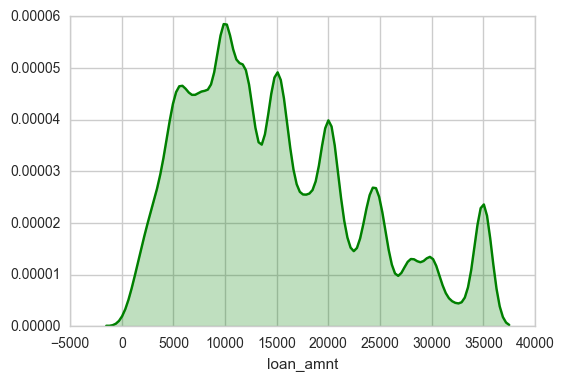

In [145]:
sns.distplot(LoanStats['loan_amnt'], hist=False, color="g", kde_kws={"shade": True})

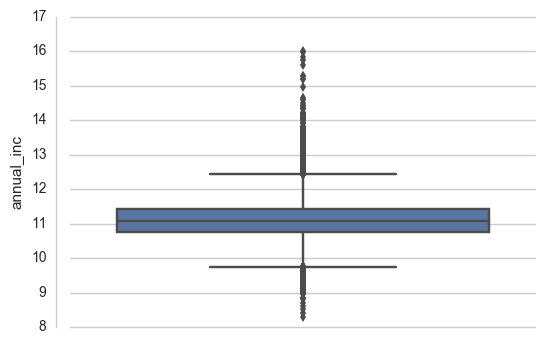

In [46]:
sns.set_style('whitegrid')
sns.boxplot(y=numpy.log(LoanStats['annual_inc']))
sns.despine(offset=10, trim=True)

Looks like there are lots of outliers. 

In [49]:
LoanStats[LoanStats['annual_inc'] > LoanStats['annual_inc'].quantile(0.99)]

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,verification_status,title,dti,...,inq_last_6mths,open_acc,revol_util,revol_bal,total_acc,home_ownership,purpose,addr_state,tax_liens,class
2227,28000,36 months,12.88,941.82,C2,8 years,450000.0,Source Verified,Credit card refinancing,14.94,...,3,25.0,65.0,167659.0,41,MORTGAGE,credit_card,KS,0,0
2294,32000,60 months,23.13,904.49,F2,10+ years,300000.0,Not Verified,Debt consolidation,12.80,...,2,24.0,66.1,31001.0,59,OWN,debt_consolidation,CA,0,0
2683,35000,36 months,17.27,1252.56,D3,2 years,255000.0,Source Verified,Debt consolidation,13.68,...,1,14.0,76.5,40241.0,45,MORTGAGE,debt_consolidation,FL,0,0
2876,24000,36 months,8.49,757.51,B1,4 years,525000.0,Source Verified,Credit card refinancing,5.14,...,1,9.0,87.0,53082.0,37,MORTGAGE,credit_card,FL,1,0
2979,28000,36 months,6.99,864.44,A3,7 years,425000.0,Source Verified,Home improvement,2.49,...,1,13.0,10.4,10303.0,45,MORTGAGE,home_improvement,WA,0,1
3366,6000,36 months,11.48,197.80,B5,7 years,270000.0,Source Verified,Home improvement,11.14,...,2,22.0,17.1,4463.0,40,OWN,home_improvement,TX,0,0
4181,30000,36 months,16.59,1063.48,D2,2 years,300000.0,Source Verified,Other,6.21,...,1,11.0,99.8,21955.0,34,OWN,other,NY,0,0
4722,16000,36 months,11.99,531.36,C1,2 years,600000.0,Source Verified,Credit card refinancing,11.02,...,0,19.0,67.6,290662.0,42,MORTGAGE,credit_card,TX,0,0
4902,10000,36 months,13.99,341.73,C4,10+ years,300000.0,Source Verified,Home improvement,3.33,...,0,5.0,95.1,48494.0,9,MORTGAGE,home_improvement,NH,0,0
5113,20000,36 months,11.48,659.33,B5,10+ years,350000.0,Not Verified,Other,10.05,...,0,18.0,59.5,216586.0,36,OWN,other,NJ,0,0


In [55]:
# Lets check the richest guy 
LoanStats.loc[LoanStats['annual_inc'].idxmax()]

loan_amnt                           10550
term                            36 months
int_rate                            15.61
installment                        368.88
sub_grade                              D1
emp_length                      10+ years
annual_inc                    8.90006e+06
verification_status       Source Verified
title                  Debt consolidation
dti                                  0.09
delinq_2yrs                             0
inq_last_6mths                          1
open_acc                                9
revol_util                          102.1
revol_bal                            5311
total_acc                              11
home_ownership                       RENT
purpose                debt_consolidation
addr_state                             FL
tax_liens                               0
class                                   1
Name: 217708, dtype: object

<a id='#Takeaway2'></a>

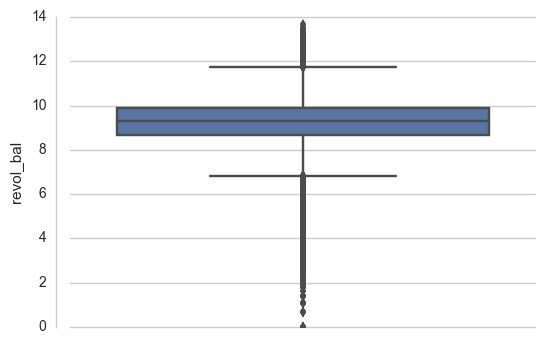

In [58]:
sns.boxplot(y=numpy.log(LoanStats['revol_bal']))
sns.despine(offset=10, trim=True)

C:\Users\Vini\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


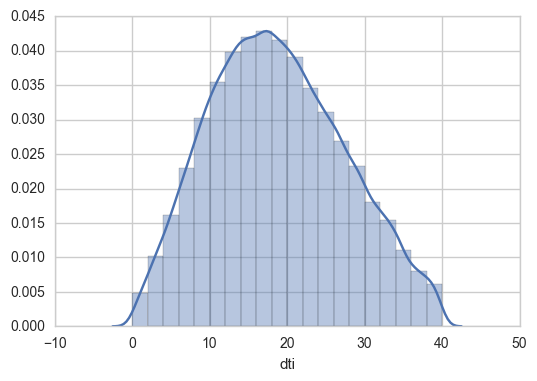

In [64]:
sns.distplot(LoanStats['dti'],bins=20)

In [60]:
LoanStats.describe(include=['O']).T

,count,unique,top,freq
term,157498,2,36 months,111585
sub_grade,157498,35,C1,9584
emp_length,157498,12,10+ years,51642
verification_status,157498,3,Source Verified,66676
title,157462,18,Debt consolidation,97379
home_ownership,157498,3,MORTGAGE,77962
purpose,157498,14,debt_consolidation,97402
addr_state,157498,49,CA,23714


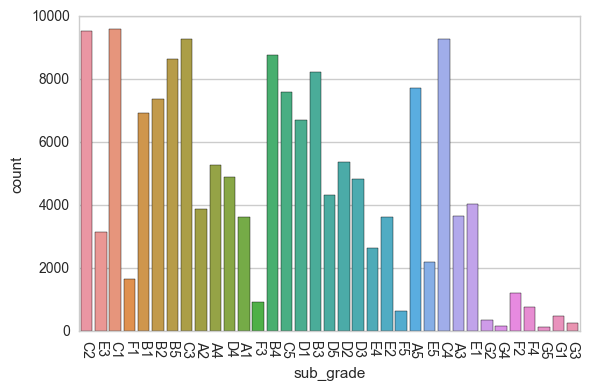

In [77]:
sns.countplot(LoanStats['sub_grade'],orient="h")
plt.xticks(rotation=270)
#plt.gca().tick_params(axis='x)
plt.tight_layout()

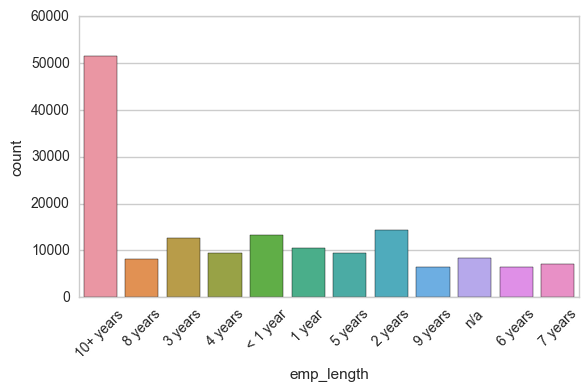

In [79]:
sns.countplot(LoanStats['emp_length'])
plt.xticks(rotation=45)
plt.tight_layout()

### Takeaway from "Univariate Analysis"
What did I learn? <br>
[[ go back to the top ]](#Table-of-contents)

##### Can anomalies/outliers/anything weird be spotted?
##### If yes(for the previous question) ,what is the plan to handle anomalies/outliers/anything weird that has be spotted?
annual_inc and revol_bal distribution are severly skewed as expected. Log Transformation may be needed to deal with the skewness.  

<a id='#Multivariate'></a>

### Multivariate Analysis
[[ go back to the top ]](#Table-of-contents)<br>
<br>
This is best done by Visualizations and by feature correlations by pivoting features against each other<br>


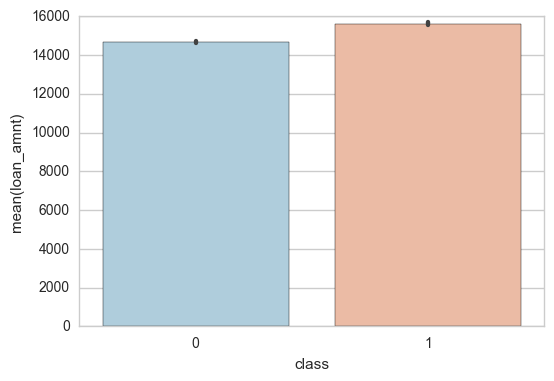

In [141]:
sns.set_style('whitegrid')
#Lets see if loan_amnt is correlated to class(1 <- bad class)
sns.barplot(x=LoanStats['class'], y=LoanStats['loan_amnt'], palette='RdBu_r')

Smaller loans are easier to pay-off hence bar is higher for class 1.

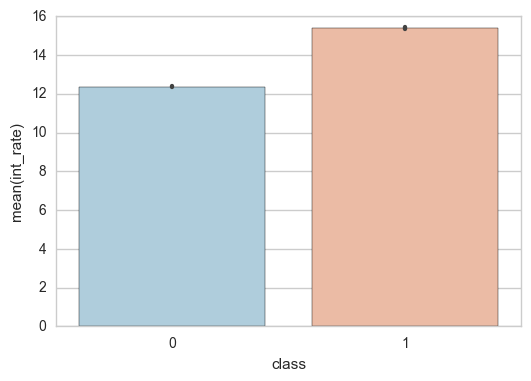

In [260]:
sns.barplot(x=LoanStats['class'], y=LoanStats['int_rate'], palette='RdBu_r')

This is pretty intuitive. 

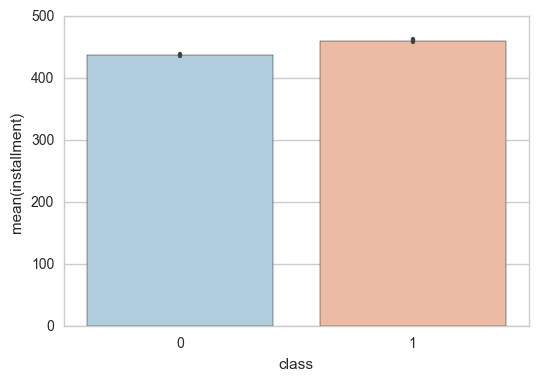

In [261]:
sns.barplot(x=LoanStats['class'], y=LoanStats['installment'], palette='RdBu_r')

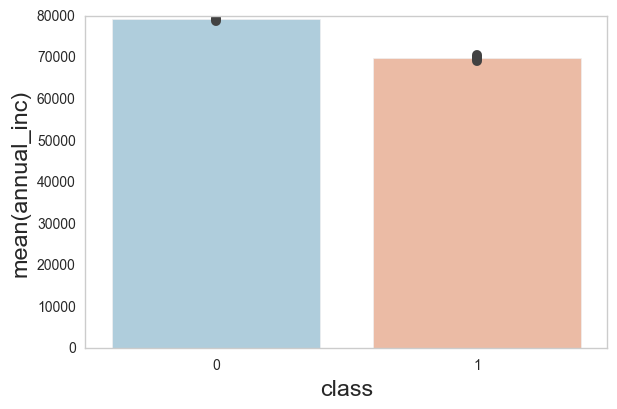

In [490]:
sns.barplot(x=LoanStats['class'], y=LoanStats['annual_inc'], palette='RdBu_r')

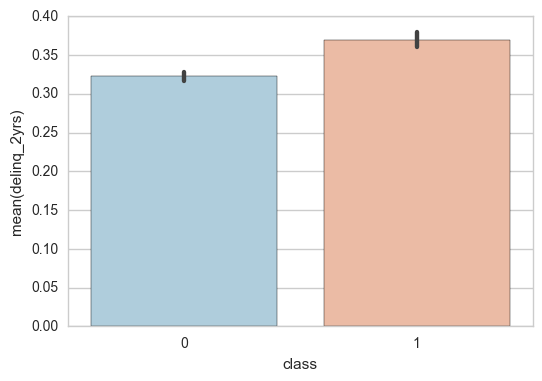

In [262]:
sns.barplot(x=LoanStats['class'], y=LoanStats['delinq_2yrs'], palette='RdBu_r')

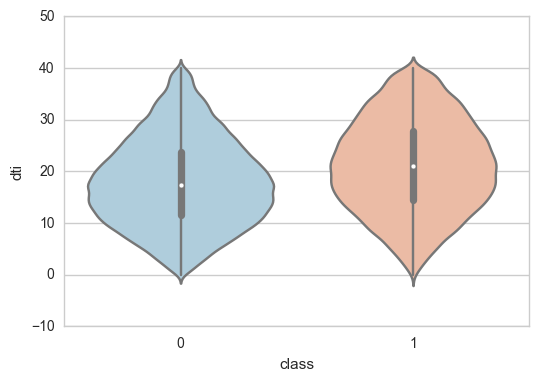

In [81]:
sns.violinplot(x=LoanStats['class'], y=LoanStats['dti'], palette='RdBu_r')

(array([0, 1]), <a list of 2 Text xticklabel objects>)

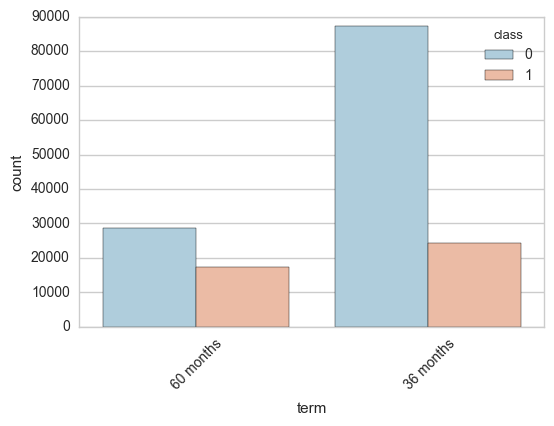

In [256]:
sns.countplot(LoanStats['term'], hue=LoanStats['class'], palette='RdBu_r')
#plt.gca().tick_params(axis='x',labelsize="small")
plt.xticks(rotation=45)

Loans with a term of 60 months are more like to result in debt.

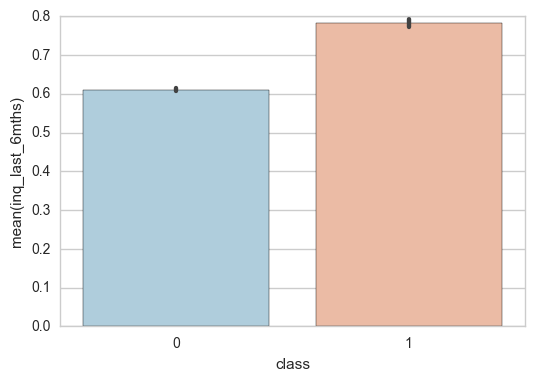

In [374]:
sns.barplot(y=LoanStats['inq_last_6mths'], x=LoanStats['class'], palette='RdBu_r')

The more the number of enquiries made by the loaner, the more likely the loan will be delinquent.

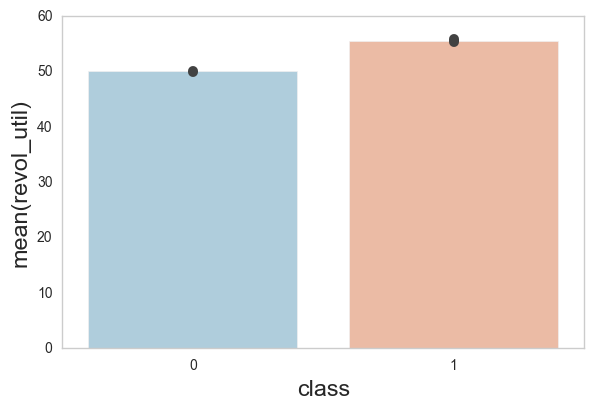

In [491]:
sns.barplot(y=LoanStats['revol_util'], x=LoanStats['class'], palette='RdBu_r')

In [369]:
LoanStats[LoanStats['revol_util'].isnull()][columns_to_keep]

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,verification_status,title,dti,...,inq_last_6mths,open_acc,revol_util,revol_bal,total_acc,home_ownership,purpose,addr_state,tax_liens,class
12432,12000,36 months,19.99,445.91,E4,3 years,150000.00,Verified,Debt consolidation,15.82,...,0,6.0,NaN,0.0,57,RENT,debt_consolidation,TX,0,0
13123,27200,36 months,7.26,843.10,A4,9 years,170000.00,Verified,Debt consolidation,16.57,...,0,6.0,NaN,21084.0,17,MORTGAGE,debt_consolidation,IL,0,0
18018,10500,36 months,15.41,366.10,D1,< 1 year,25000.00,Not Verified,Car financing,33.37,...,2,6.0,NaN,0.0,23,RENT,car,WI,0,1
18451,2000,36 months,12.59,67.00,C2,10+ years,135000.00,Source Verified,Medical expenses,14.80,...,0,7.0,NaN,0.0,37,MORTGAGE,medical,NY,0,0
18705,1600,36 months,17.86,57.74,D5,9 years,56000.00,Source Verified,Other,5.23,...,0,3.0,NaN,0.0,10,OWN,other,UT,0,0
25433,12300,36 months,15.41,428.86,D1,10+ years,41000.00,Verified,Debt consolidation,16.06,...,0,2.0,NaN,39752.0,12,MORTGAGE,debt_consolidation,TX,0,1
30541,4200,36 months,13.67,142.88,C4,10+ years,60000.00,Source Verified,Debt consolidation,33.36,...,0,6.0,NaN,0.0,21,RENT,debt_consolidation,TX,0,0
40761,2650,36 months,11.22,87.04,B5,< 1 year,20000.00,Verified,Home improvement,20.77,...,0,2.0,NaN,0.0,12,MORTGAGE,home_improvement,AL,0,0
44273,8850,36 months,16.55,313.55,D2,6 years,105000.00,Not Verified,Other,4.49,...,0,5.0,NaN,0.0,26,MORTGAGE,other,IL,0,0
47062,4200,36 months,13.18,141.88,C3,3 years,50000.00,Not Verified,Credit card refinancing,15.65,...,2,6.0,NaN,0.0,20,RENT,credit_card,MN,0,0


In [370]:
LoanStats[LoanStats['revol_util'].isnull()]['class'].value_counts()

0    54
1    17
Name: class, dtype: int64

No idea what nans in this column represent , hence those data-points will be dropped

In [371]:
LoanStats['revol_util'].value_counts()

0.0      642
53.0     365
44.0     357
47.0     357
52.0     350
61.0     330
58.0     329
56.0     329
55.0     325
49.0     325
54.0     324
64.0     318
51.0     318
57.0     318
63.0     316
65.0     316
50.0     315
62.0     314
42.0     313
39.0     312
59.0     311
37.0     309
46.0     307
66.0     306
60.0     306
68.0     304
38.0     301
69.0     300
43.0     299
45.0     297
        ... 
118.6      1
113.4      1
131.0      1
124.5      1
120.5      1
116.5      1
115.0      1
114.5      1
106.0      1
110.6      1
111.1      1
112.1      1
113.9      1
126.3      1
123.3      1
112.8      1
111.8      1
105.4      1
106.9      1
107.4      1
107.8      1
117.6      1
114.4      1
116.4      1
121.4      1
105.3      1
132.1      1
127.6      1
118.1      1
105.0      1
Name: revol_util, dtype: int64

In [457]:
df1 = pd.DataFrame(LoanStats[LoanStats['class'] == 1]['revol_util'].value_counts())
df1.columns=['bad loans']
df2 = pd.DataFrame(LoanStats[LoanStats['class'] == 0]['revol_util'].value_counts())
df2.columns=['good loans']
df3 = df1.join(df2).fillna(0)

In [458]:
good = df3.apply(lambda x : (df3['good loans']/(df3['bad loans'] + df3['good loans']))*100 )
df3['bad loans'] = df3.apply(lambda x : (df3['bad loans']/(df3['bad loans'] + df3['good loans']))*100 )
df3['good loans'] = good

In [468]:
df3

,bad loans,good loans
0.0,19.003115,80.996885
65.0,37.974684,62.025316
53.0,32.054795,67.945205
69.0,36.000000,64.000000
68.0,34.210526,65.789474
44.0,28.851541,71.148459
52.0,28.571429,71.428571
64.0,31.132075,68.867925
61.0,30.000000,70.000000
54.0,29.938272,70.061728


(0, 100)

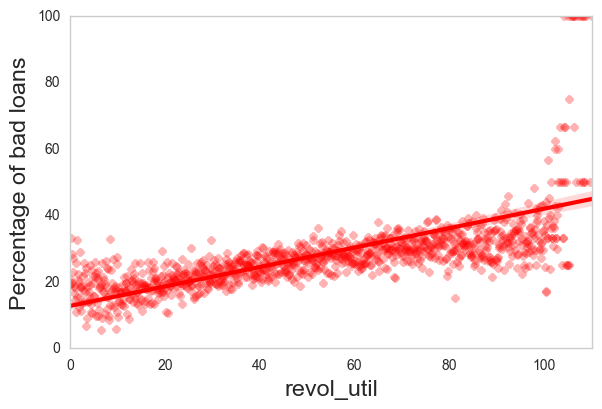

In [489]:
sns.set_style('whitegrid', {'axes.grid' : False})
sns.regplot(x=df3.index.values, y=df3['bad loans'], scatter=True, marker='x', color='red', scatter_kws={'s':15,"alpha":0.3}, line_kws={"color":"r","lw":3})
plt.xlabel("revol_util")
plt.ylabel("Percentage of bad loans")
plt.xlim(0,110)
plt.ylim(0,100)

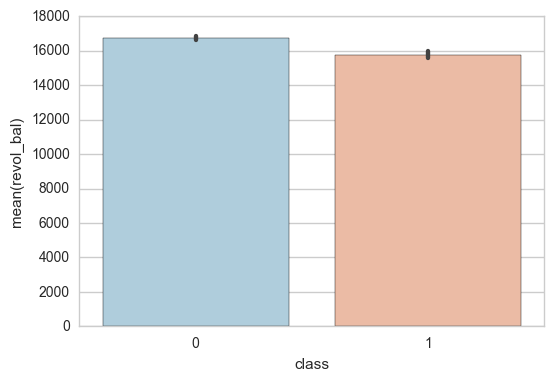

In [364]:
sns.barplot(y=LoanStats['revol_bal'], x=LoanStats['class'], palette='RdBu_r')

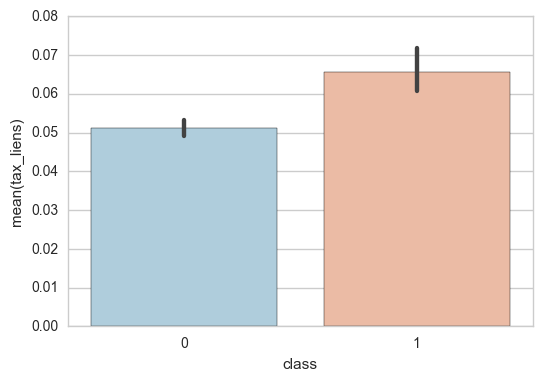

In [365]:
sns.barplot(y=LoanStats['tax_liens'], x=LoanStats['class'], palette='RdBu_r')

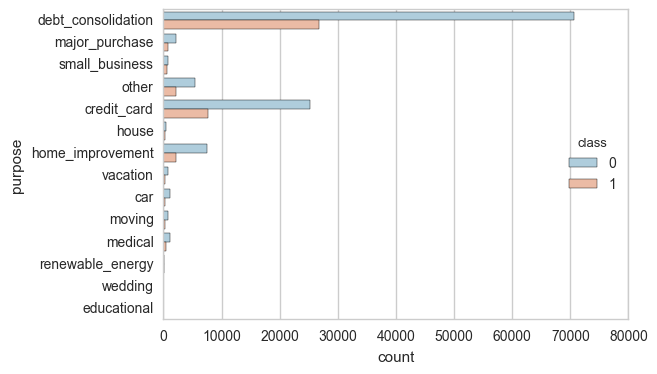

In [112]:
sns.countplot(y=LoanStats['purpose'], hue=LoanStats['class'], palette='RdBu_r')
#plt.gca().tick_params(axis='x',labelsize="small")
#plt.xticks(rotation=45)

The column 'title' is pretty much same as 'purpose' , hence it is safe to drop this column('title')

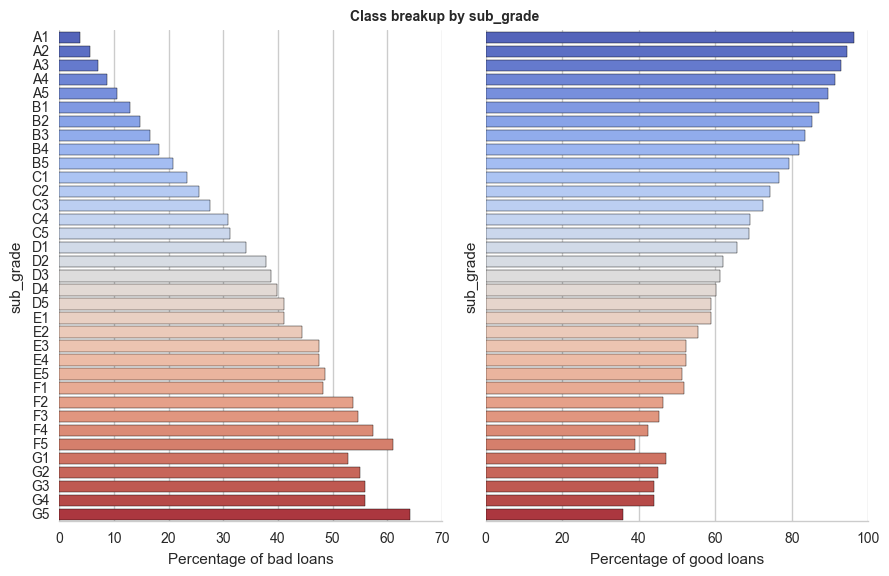

In [255]:
def plot_class_percentages(groupbyobj, column):
    df = pd.DataFrame(groupbyobj['class'].value_counts(normalize=True)*100).unstack().xs('class', axis=1, drop_level=True).reset_index()
    f, (ax1,ax2) = plt.subplots(1, 2, figsize=(9,6), sharey=True)
    sns.despine(left=True)
    f.suptitle('Class breakup by '+column, fontweight='bold')
    f.subplots_adjust(top=2)
    sns.barplot(y=df[column], x=df[1], ax=ax1, palette='coolwarm').set_xlabel("Percentage of bad loans")
    sns.barplot(y=df[column], x=df[0], ax=ax2, palette='coolwarm').set_xlabel("Percentage of good loans")
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    return 
#For a given subgrade what percentage of loans turned out to be bad and what percentage good?
plot_class_percentages(LoanStats.groupby(LoanStats['sub_grade']),'sub_grade')

This shows that sub-grades are very strong predictors of whether the loan will be paid off or not - G5 being the riskiest and A1 being the least risky.

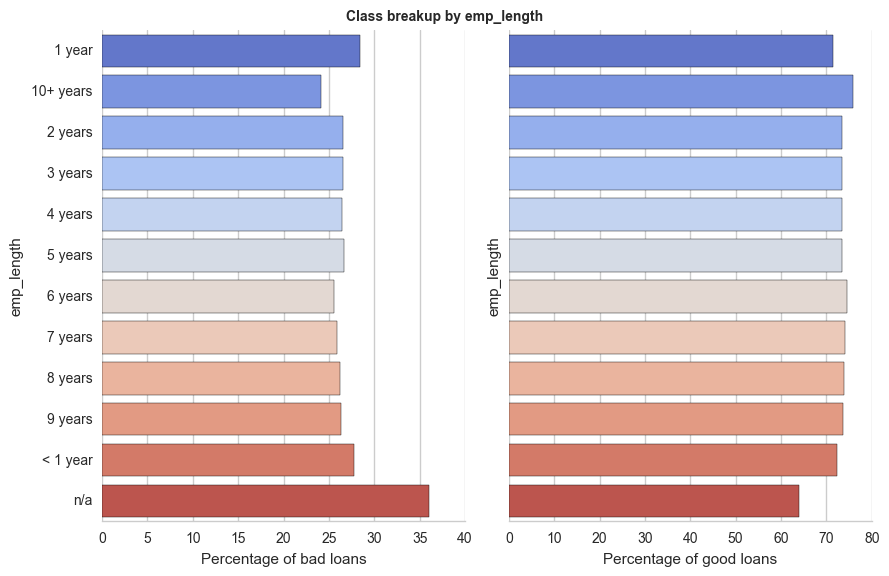

In [239]:
plot_class_percentages(LoanStats.groupby(LoanStats['emp_length']),'emp_length')

This shows that emp_length = 'n/a' (may denote loaners who were not employed ever or the data is simply not available) is the riskiest category. Though not a strong predictor like sub_grade , emp_length also be included in the classification model. 

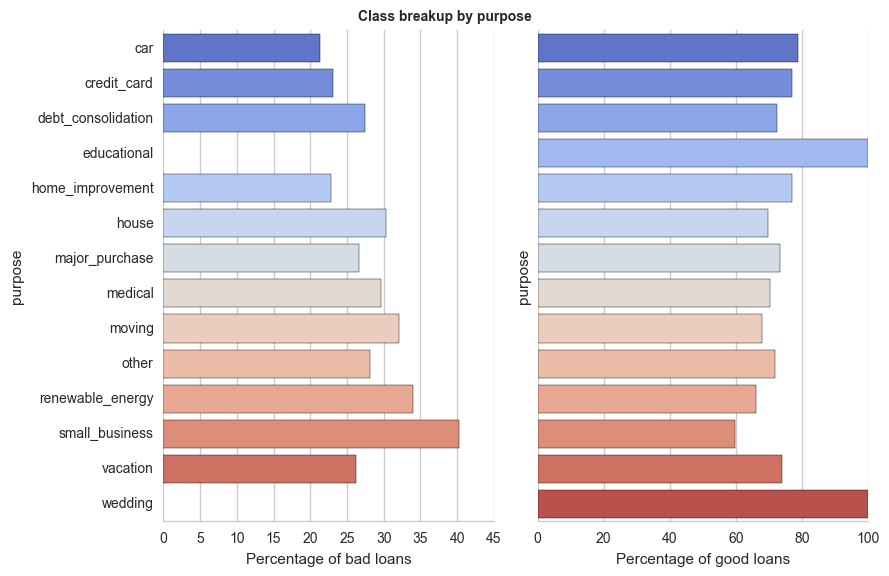

In [249]:
plot_class_percentages(LoanStats.groupby(LoanStats['purpose']),'purpose')

40 percent loaners who gave the 'purpose' as "small_business" turned out to be delinquents. 

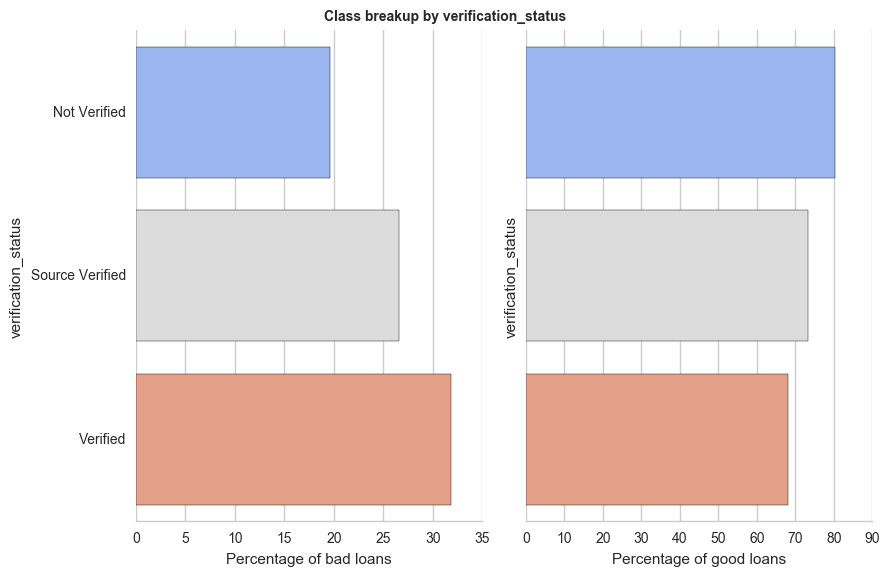

In [250]:
plot_class_percentages(LoanStats.groupby(LoanStats['verification_status']),'verification_status')

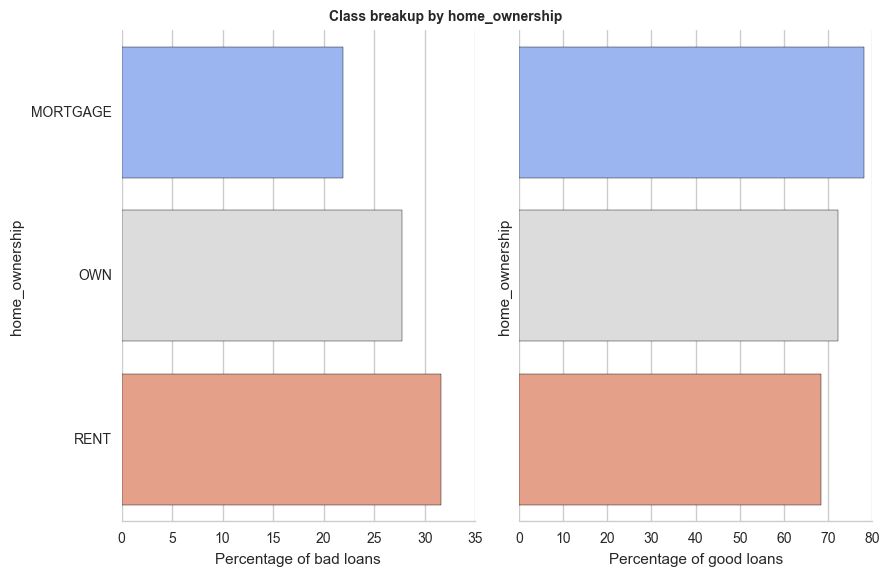

In [251]:
plot_class_percentages(LoanStats.groupby(LoanStats['home_ownership']),'home_ownership')

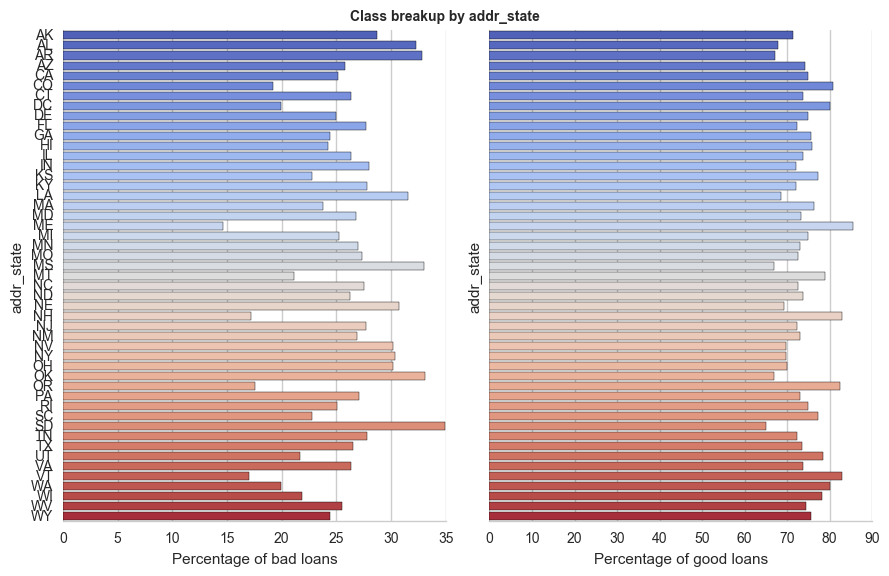

In [252]:
plot_class_percentages(LoanStats.groupby(LoanStats['addr_state']),'addr_state')

South Dakotans - 35 percentage of loans given to them resulted in delinquency.

In [263]:
#EDA for the column 'delinq_2yrs'
LoanStats['delinq_2yrs'].value_counts()

0     125960
1      20858
2       6129
3       2203
4       1056
5        513
6        306
7        148
8        102
9         65
10        45
11        37
13        19
14        19
12        16
15         7
16         4
17         4
18         3
27         1
20         1
26         1
39         1
Name: delinq_2yrs, dtype: int64

In [269]:
pd.cut(LoanStats['delinq_2yrs'].where(LoanStats['delinq_2yrs'] > 0), 6, labels=['1-7days','7-13days','13-20days','20-26days','26-32days','32-39days']).value_counts()

1-7yrs      31213
7-13yrs       284
13-20yrs       38
32-39yrs        1
26-32           1
20-26           1
Name: delinq_2yrs, dtype: int64

In [280]:
LoanStats[LoanStats['delinq_2yrs'] > 19][['delinq_2yrs','class']]

,delinq_2yrs,class
203534,26,0
269484,27,1
316643,39,0
360764,20,1


These can be deleted. 

In [329]:
temp =LoanStats[['delinq_2yrs','class']].where(temp['delinq_2yrs'] < 20).reset_index(drop=True)
temp['categories'] = pd.cut(temp['delinq_2yrs'].where(temp['delinq_2yrs'] > 0), 3, labels=['1-7days','7-13days','13-20days'])

In [330]:
#temp['categories'].cat.add_categories(['not delin'])
#temp['categories'].fillna(value='not delin')
temp['categories'] = temp['categories'].cat.add_categories(['not delin']).fillna(value='not delin')
temp['categories'].cat.reorder_categories(['not delin','1-7days','7-13days','13-20days'],ordered=True,inplace=True)

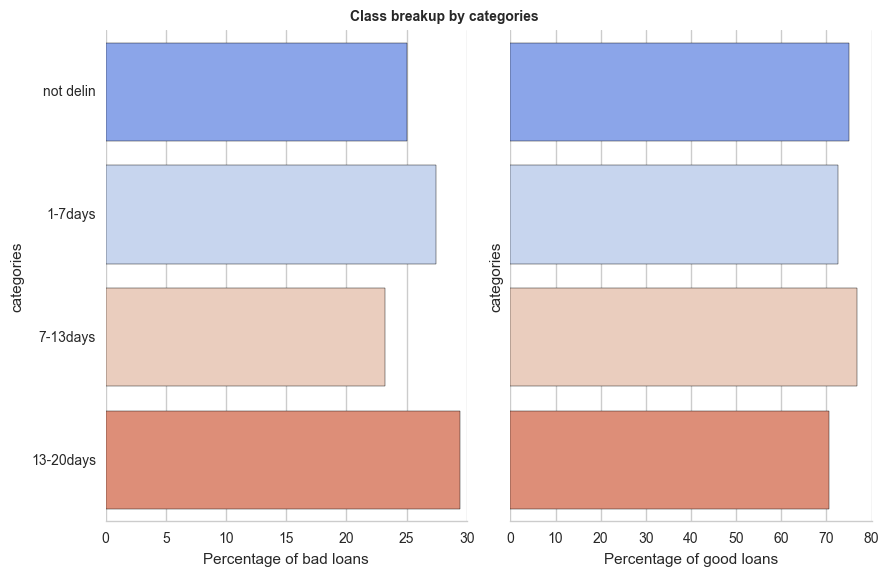

In [334]:
plot_class_percentages(temp.groupby(temp['categories']),'categories')

In [335]:
temp.groupby(temp['categories'])['class'].value_counts(normalize=True)

categories  class
not delin   0.0      0.749656
            1.0      0.250344
1-7days     0.0      0.725688
            1.0      0.274312
7-13days    0.0      0.768000
            1.0      0.232000
13-20days   0.0      0.705882
            1.0      0.294118
Name: class, dtype: float64

In [338]:
temp[temp['categories'] == '7-13days' ].count()

delinq_2yrs    125
class          125
categories     125
dtype: int64

It is a bit counter-intuitive that 7-13 days category did better than other categories ,may be just by chance.

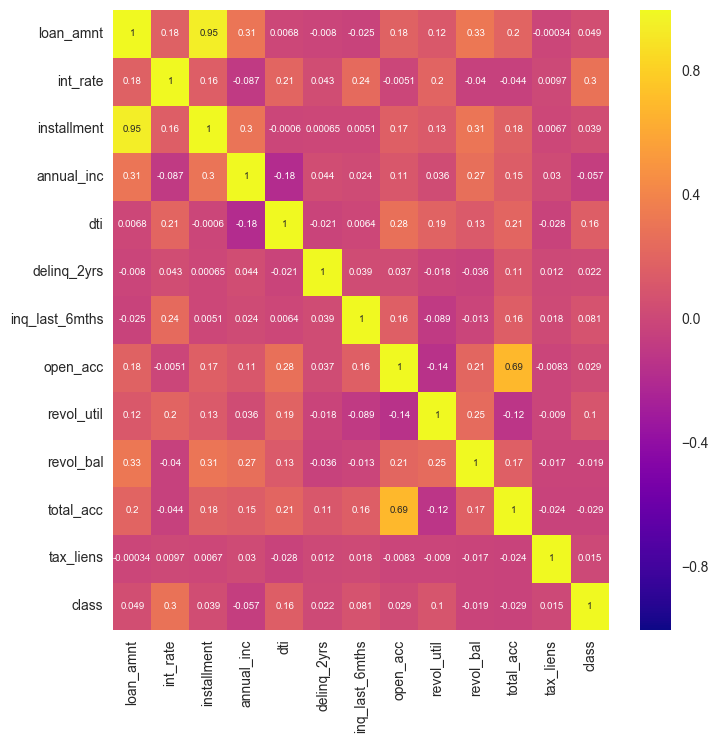

In [350]:
Corr = LoanStats.corr()
plt.subplots(figsize=(8,8))
sns.heatmap(Corr,cmap="plasma", annot=True, annot_kws={"size": 7})

Here we find that loan_amt and installment are highly correlated (which makes sense).If two numerical features are perfectly correlated, then one doesn't add any additional information (it is determined by the other).For a fixed number of training examples, increasing the number of features typically increases classification accuracy to a point but as the number of features continue to increase, classification accuracy will eventually decrease because we are then undersampled relative to the large number of features.('Curse of dimensionality').
Hence it is best to delete 'installment'.
Also open_acc and total_acc are also correlated..lets find out which one to keep and which one to drop.


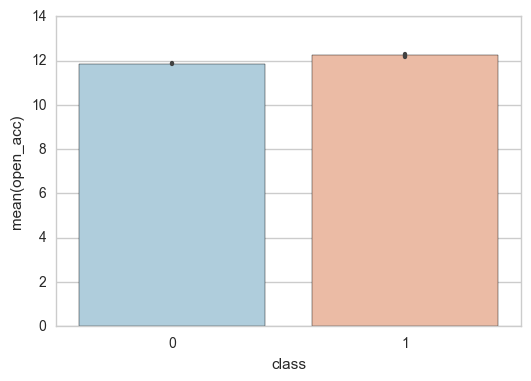

In [358]:
sns.barplot(x=LoanStats['class'], y=LoanStats['open_acc'], palette='RdBu_r')

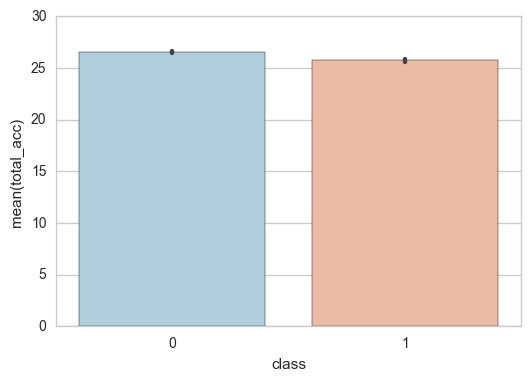

In [359]:
sns.barplot(x=LoanStats['class'], y=LoanStats['total_acc'], palette='RdBu_r')

So lets drop both.

<a id='#Takeaway3'></a>

### Takeaway from "Multivariate Analysis"
What did I learn? <br>
[[ go back to the top ]](#Table-of-contents)
##### Numerical features 
loan_amnt : On an average ,smaller loans are less likely to  default.

int_rate : Strong predictor.Its pretty intuitive that higher the interest rate the more likely it is to not get paid off. 

installment : highly correlated to loan_amt hence can be removed.

annual_inc : Mean annual income is higher for people who paid off their loans (around $10,000 difference in the means of the 'good loaners' and 'bad loaners' groups)

dti : On average higher for 'bad loaners'

delinq_2yrs : This will be dropped.

inq_last_6mths : The more the number of enquiries made by the loaner, the more likely the loan will be delinquent.

open_acc : This will be dropped

revol_util : Percentage of bad loans increase as this goes higher. 

revol_bal : This will be dropped.

total_acc : This will be dropped

tax_liens : higher for bad loaners

##### Categorical feature 

sub_grade : Very strong predictor..which is obvious,considering LC's own risk assessment algoritmn comes up with these grades.Sub_grade G5 carries the highest risk. Around 65% of G5 loans result in delinquency.A1 is the least risky(almost all A1 loans were paid off)   

emp_length : Not a very strong predictor but can be considered.

Source Verified : Can be dropped.

title : similar to purpose , can be dropped

purpose : Purpose given as "small business" seems like a red-flag. 

home_ownership : Renters are more likely to default.

addr_state : Way too many categories ..this will be dropped for now.
##### Can anomalies/outliers/anything weird be spotted?
There are 71 datapoints with revolt_util as NaNs.54 of such instances were good loans and 17 bad.
##### If yes(for the previous question) ,what is the plan to handle anomalies/outliers/anything weird that has be spotted?
These rows will be dropped. 


<a id='#Feature1'></a>

# Feature Engineering : Remove Features

[[ go back to the top ]](#Table-of-contents)


In [24]:
#Per EDA
columns_to_remove = ['installment', 'delinq_2yrs', 'open_acc', 'revol_bal', 'total_acc', 'verification_status', 'title', 'addr_state']

In [25]:
columns_to_keep = [x for x in columns_to_keep if x not in columns_to_remove]

In [26]:
LoanStats = LoanStats[columns_to_keep]

In [27]:
# Deleting the 71 rows where 'revol_util' = NaN
LoanStats = LoanStats[LoanStats['revol_util'].notnull()]

In [28]:
columns_to_keep

['loan_amnt',
 'term',
 'int_rate',
 'sub_grade',
 'emp_length',
 'annual_inc',
 'dti',
 'inq_last_6mths',
 'revol_util',
 'home_ownership',
 'purpose',
 'tax_liens',
 'class']

<a id='#split'></a>

# Split into training and testing datasets
[[ go back to the top ]](#Table-of-contents)<br>


In [29]:
LoanStats.reset_index(drop=True, inplace=True)

In [30]:
X = LoanStats[LoanStats.columns.difference(['class'])]

In [31]:
y = LoanStats['class']

In [32]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    train_size=0.5, 
                                                    random_state=123)

In [33]:
train_class_counts = train_y.value_counts()
train_class_counts

0    58134
1    20579
Name: class, dtype: int64

In [34]:
print("train class 0  : {0:0.2f}%".format((train_class_counts[0]/(train_class_counts[0]+train_class_counts[1]))*100))
print("train class 1  : {0:0.2f}%".format((train_class_counts[1]/(train_class_counts[0]+train_class_counts[1]))*100))

train class 0  : 73.86%
train class 1  : 26.14%


In [35]:
test_class_counts = test_y.value_counts()
test_class_counts

0    57745
1    20969
Name: class, dtype: int64

In [36]:
print("test class 0  : {0:0.2f}%".format((test_class_counts[0]/(test_class_counts[0]+test_class_counts[1]))*100))
print("test class 1  : {0:0.2f}%".format((test_class_counts[1]/(test_class_counts[0]+test_class_counts[1]))*100))

test class 0  : 73.36%
test class 1  : 26.64%


This was how class representations were in the original dataset 
- class 0  : 73.61%
- class 1  : 26.39%

The training and test datasets have the same composition which is good.

In [50]:
LoanStats.isnull().values.any()

False

In [38]:
train_X.isnull().values.any()

False

In [39]:
test_X.isnull().values.any()

False

<a id='#Feature'></a>

# Feature Engineering

[[ go back to the top ]](#Table-of-contents)<br>
Preliminary Analysis and EDA were indicative of a tree-based modeling approach. However , trying out a linear model would have been appropriate especially as a baseline model. But I want to focus more on the class balancing part in this project ,therefore I have made up my mind to use only Random Forest and perhaps AdaBoost .<br><br>
Random forests fit data better from the get-go without transforms.
They’re more forgiving in almost every way. You don’t need to scale your data, you don’t need to do any monotonic transformations (log etc). You often don’t even need to remove outliers.
You can throw in categorical features, and it’ll automatically partition the data if it aids the fit.
Random forest can be made to work directly on categorical values. Ie during decision learnings you can propose potential splits as diffrent combinations of categories. For such methods it is often convenient to use ints to represent the categories because an array of ints is much nicer to work with then an array of strings on a computational level. 

<a id='#Feature2'></a>

### Feature Engineering : Convert Categorical Variables 

[[ go back to the top ]](#Table-of-contents)

Logistic regression, distance based methods such as kNN, support vector machines, tree based methods etc. in sklearn needs numeric arrays. Features having string values cannot be handled by these learners.<br>
Sklearn provides a very efficient tools for encoding the levels of a categorical features into numeric values.<br>

In [84]:
train_X.describe(include=['O']).T

,count,unique,top,freq
emp_length,78713,12,10+ years,25784
home_ownership,78713,3,MORTGAGE,38900
purpose,78713,13,debt_consolidation,48635
sub_grade,78713,35,C1,4814
term,78713,2,36 months,55785


In [55]:
train_X['emp_length'].value_counts() 

10+ years    25784
2 years       7145
< 1 year      6602
3 years       6349
1 year        5334
5 years       4741
4 years       4646
n/a           4225
8 years       4093
7 years       3452
9 years       3181
6 years       3161
Name: emp_length, dtype: int64

In [37]:
# encoding emp_length with ordinality 
#Employment length had to be encoded in such a way as to maintain ordinality that made sense 
#(eg. 5 years > 2 years > 1 year > less than 1 year > no experience).                          
#With Scikit-learn's  LabelEncoder , the classes are assumed to have no true order and integers are selected at random.
encodings = {"emp_length":     {"n/a": -1, "< 1 year": 0, "1 year":1, "2 years":2, "3 years":3, "4 years":4, 
                                "5 years":5, "6 years":6, "7 years":7, "8 years":8, "9 years":9,  "10+ years":10
                }}
train_X.replace(encodings)
   

,annual_inc,dti,emp_length,home_ownership,inq_last_6mths,int_rate,loan_amnt,purpose,revol_util,sub_grade,tax_liens,term
97739,70000.0,8.11,9,MORTGAGE,0,12.29,5700,major_purchase,92.8,C1,0,36 months
42668,47000.0,21.58,5,MORTGAGE,0,10.99,8400,debt_consolidation,63.9,B4,0,36 months
39187,33000.0,22.22,3,RENT,0,16.99,10000,major_purchase,48.5,D3,0,36 months
152114,32500.0,36.82,2,RENT,0,17.14,6075,credit_card,93.3,D4,0,36 months
27680,70000.0,39.79,6,MORTGAGE,0,13.99,12000,debt_consolidation,90.2,C4,0,36 months
27285,45000.0,33.68,10,MORTGAGE,0,12.69,3000,home_improvement,24.8,C2,2,36 months
74481,100000.0,10.46,10,RENT,0,5.32,16800,debt_consolidation,1.8,A1,0,36 months
142234,48000.0,30.73,7,RENT,0,6.99,15000,debt_consolidation,25.5,A3,0,36 months
124936,74000.0,20.08,10,MORTGAGE,0,13.33,20225,debt_consolidation,48.3,C3,0,36 months
125600,49878.0,18.98,2,RENT,1,12.69,12000,credit_card,76.5,C2,0,60 months


In [58]:
train_X['home_ownership'].value_counts() 

MORTGAGE    38900
RENT        31396
OWN          8417
Name: home_ownership, dtype: int64

In [38]:
# 'dummy variable trap'(multicollinearity when one can be predicted from the others) applies to linear regression models ,NNs
# LDA hence they require drop_first=True. However, in a tree, predictors are evaluated one-by-one, 
#and therefore omitting one of the k dummies can result in an inferior predictive model. 
#For example, suppose we have 12 monthly dummies and that in reality only January is different 
#from other months (the outcome differs between January and other months). 
#Now, we run a tree omitting the January dummy as an input and keep the other 11 monthly dummies. 
#The only way the tree might discover the January effect is by creating 11 levels of splits by each of the dummies.
#This is much less efficient than a single split on the January dummy. 
#Courtesy : http://www.bzst.com/2014/03/the-use-of-dummy-variables-in.html
dummies = pd.get_dummies(train_X, columns=['home_ownership','term','purpose','sub_grade'], drop_first=False)
train_X = dummies

In [39]:
train_X.replace(encodings, inplace=True)

In [43]:
train_X.describe().T

,count,mean,std,min,25%,50%,75%,max
annual_inc,78713.0,77077.927143,75791.783068,4000.00,46700.00,65000.00,92000.00,8706582.00
dti,78713.0,18.762531,8.654576,0.00,12.20,18.24,24.89,39.99
emp_length,78713.0,5.578215,3.936666,-1.00,2.00,6.00,10.00,10.00
inq_last_6mths,78713.0,0.656461,0.932587,0.00,0.00,0.00,1.00,6.00
int_rate,78713.0,13.148821,4.493945,5.32,9.99,12.69,16.55,28.99
loan_amnt,78713.0,14899.179932,8603.627236,1000.00,8000.00,13000.00,20000.00,35000.00
revol_util,78713.0,51.525118,24.411063,0.00,33.10,51.60,70.10,153.70
tax_liens,78713.0,0.055823,0.478429,0.00,0.00,0.00,0.00,85.00
home_ownership_MORTGAGE,78713.0,0.494200,0.499970,0.00,0.00,0.00,1.00,1.00
home_ownership_OWN,78713.0,0.106933,0.309030,0.00,0.00,0.00,0.00,1.00


After encoding category variables the number of columns increased from 13 to a whopping 61. At this point I would have benefitted from some dimensionality reduction techniques like PCA(Principal Component Analysis). PCA finds the linear overlap, so will naturally tend to group similar features into the same feature. But again as I would like to focus on class balancing , I chose to skip that step.

<a id='#Feature-Selection'></a>

# Feature Selection

[[ go back to the top ]](#Table-of-contents)
There are automatic feature selection techniques that you can use to prepare your machine learning data in python with scikit-learn.The simplest method to select features is using univariate statistics, that is by looking at each feature individually and running a statistical test to see whether it is related to the target. This kind of test is also known as analysis of variance (ANOVA).
This is how Feature Selection will benefit -
Reduces Overfitting        : Less redundant data means less opportunity to   make decisions based on noise.
Improves Accuracy         :  Less misleading data means modeling accuracy improves.
Reduces Training Time  :  Less data means that algorithms train faster.
(Courtesy : http://machinelearningmastery.com/ )


Initially I tried using the  chi squared (chi^2) statistical test for Univariate selection but as I had negative values in the emp_len column this couldn't be executed.

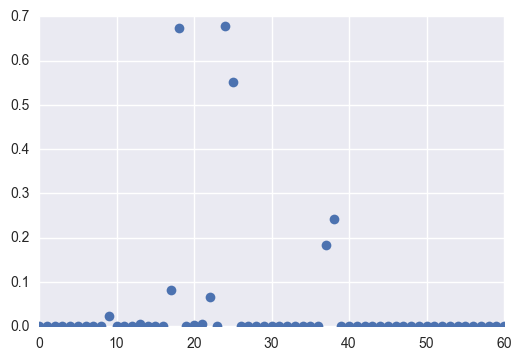

In [40]:
from sklearn.feature_selection import f_classif, f_regression, chi2
F, p = f_classif(train_X, train_y)
plt.figure()
plt.plot(p, 'o')

In [42]:
# Low p-values indicate informative features. Finding the indices corresponding to the 10 smallest p-values
idx = numpy.argpartition(p, 11)[:11]
print(idx)

[30 10  1  3  4 12  6 11  8 26 29]


In [84]:
p[idx]

array([  2.63442003e-107,   2.07340740e-170,   0.00000000e+000,
         4.06645754e-120,   0.00000000e+000,   0.00000000e+000,
         1.36415845e-178,   0.00000000e+000,   1.09959113e-180,
         7.05826971e-105,   1.62316658e-101])

In [43]:
train_X.columns[idx]

Index(['sub_grade_A5', 'home_ownership_RENT', 'dti', 'inq_last_6mths',
       'int_rate', 'term_ 60 months', 'revol_util', 'term_ 36 months',
       'home_ownership_MORTGAGE', 'sub_grade_A1', 'sub_grade_A4'],
      dtype='object')

In [44]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [47]:
feature_importance = forest.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())

In [56]:
importances = forest.feature_importances_
std = numpy.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = numpy.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(train_X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


Feature ranking:
1. feature 1 (0.162787)
2. feature 6 (0.152405)
3. feature 0 (0.139226)
4. feature 5 (0.126279)
5. feature 4 (0.102190)
6. feature 2 (0.081870)
7. feature 3 (0.041907)
8. feature 15 (0.015219)
9. feature 14 (0.011852)
10. feature 11 (0.009861)
11. feature 7 (0.009827)
12. feature 8 (0.009037)
13. feature 10 (0.008914)
14. feature 12 (0.008752)
15. feature 21 (0.006504)
16. feature 16 (0.006503)
17. feature 9 (0.005724)
18. feature 41 (0.004002)
19. feature 39 (0.003974)
20. feature 44 (0.003846)
21. feature 18 (0.003840)
22. feature 38 (0.003839)
23. feature 40 (0.003822)
24. feature 42 (0.003813)
25. feature 37 (0.003734)
26. feature 43 (0.003666)
27. feature 45 (0.003570)
28. feature 46 (0.003443)
29. feature 36 (0.003413)
30. feature 47 (0.003361)
31. feature 35 (0.003164)
32. feature 48 (0.002959)
33. feature 34 (0.002848)
34. feature 19 (0.002720)
35. feature 33 (0.002664)
36. feature 49 (0.002638)
37. feature 30 (0.002557)
38. feature 23 (0.002347)
39. feature 31

In [60]:
indices = indices[0:9]

In [64]:
train_X.columns[indices]

Index(['dti', 'revol_util', 'annual_inc', 'loan_amnt', 'int_rate',
       'emp_length', 'inq_last_6mths', 'purpose_debt_consolidation',
       'purpose_credit_card'],
      dtype='object')

In [44]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold="median")
select.fit(train_X,train_y)
train_X_rf = select.transform(train_X)
print(train_X.shape)
print(train_X_rf.shape)

(78713, 61)
(78713, 31)


In [45]:
train_X_rf

array([[  7.00000000e+04,   8.11000000e+00,   9.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  4.70000000e+04,   2.15800000e+01,   5.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  3.30000000e+04,   2.22200000e+01,   3.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  1.00000000e+05,   3.35400000e+01,   5.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  3.80000000e+04,   1.51300000e+01,   6.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.78000000e+05,   8.62000000e+00,   1.00000000e+01, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

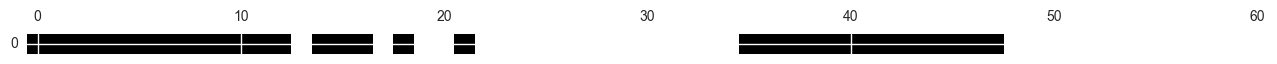

In [100]:
mask = select.get_support()
# visualize the mask. black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')

- The F-test for classification found the following features as relevant <br>   
       ['sub_grade_A5', 'home_ownership_RENT', 'dti', 'inq_last_6mths', 
       'int_rate', 'term_ 60 months', 'revol_util', 'term_ 36 months', 
       'home_ownership_MORTGAGE', 'sub_grade_A1', 'sub_grade_A4']
- Tree based model selection found these <br>
       ['dti', 'revol_util', 'annual_inc', 'loan_amnt', 'int_rate',
       'emp_length', 'inq_last_6mths', 'purpose_debt_consolidation', 
       'purpose_credit_card']
Though there are some differences (I wonder why 'forest' did not deem sub-grade and term to be important )  'dti' , 'revol_util', 'int_rate' were captured by both which is consistent with the EDA findings.

In [45]:
selected_features = ['dti','home_ownership_RENT','term_ 36 months','int_rate','revol_util','term_ 36 months','sub_grade_A1','inq_last_6mths','annual_inc', 'loan_amnt']
train_X_selected = train_X[selected_features] 

<a id='#Resampling'></a>

# Algorithm Evaluation With Resampling Methods

[[ go back to the top ]](#Table-of-contents)


In [46]:
#It is important for the training and test data to be transformed in exactly the same way.
dummies = pd.get_dummies(test_X, columns=['home_ownership','term','purpose','sub_grade'], drop_first=False)
test_X = dummies
test_X.replace(encodings, inplace=True)

In [96]:
test_X.shape

(78714, 62)

In [97]:
train_X.shape

(78713, 61)

In [102]:
train_X.columns 

Index(['annual_inc', 'dti', 'emp_length', 'inq_last_6mths', 'int_rate',
       'loan_amnt', 'revol_util', 'tax_liens', 'home_ownership_MORTGAGE',
       'home_ownership_OWN', 'home_ownership_RENT', 'term_ 36 months',
       'term_ 60 months', 'purpose_car', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_home_improvement',
       'purpose_house', 'purpose_major_purchase', 'purpose_medical',
       'purpose_moving', 'purpose_other', 'purpose_renewable_energy',
       'purpose_small_business', 'purpose_vacation', 'purpose_wedding',
       'sub_grade_A1', 'sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4',
       'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3',
       'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2',
       'sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1',
       'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5',
       'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4',
       'sub_grade

In [47]:
test_X.columns[~(test_X.columns.isin(train_X.columns))]

Index(['purpose_educational'], dtype='object')

In [115]:
# 'purpose_educational' is an unseen category , lets check if all is well
test_X['purpose_educational'].value_counts()

0.0    78713
1.0        1
Name: purpose_educational, dtype: int64

In [116]:
LoanStats[LoanStats['purpose'] == 'educational']

,loan_amnt,term,int_rate,sub_grade,emp_length,annual_inc,dti,inq_last_6mths,revol_util,home_ownership,purpose,tax_liens,class
111355,2200,36 months,11.53,B5,8 years,64500.0,19.62,0,75.2,RENT,educational,0,0


In [48]:
test_X.drop('purpose_educational', axis=1, inplace=True)

In [49]:
from sklearn.metrics import confusion_matrix
#forest = RandomForestClassifier(n_estimators=100, random_state=42)
#forest.fit(train_X, train_y)
prediction1 = forest.predict(test_X)
matrix1 = confusion_matrix(test_y,prediction1)
print(matrix1)

[[54229  3516]
 [17041  3928]]


In [50]:
from sklearn.metrics import classification_report
report1 = classification_report (test_y, prediction1, target_names=['Paid','Default'])
print("Random Forest without Feature selection")
print(report1)

Random Forest without Feature selection
             precision    recall  f1-score   support

       Paid       0.76      0.94      0.84     57745
    Default       0.53      0.19      0.28     20969

avg / total       0.70      0.74      0.69     78714



In [51]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test_y, prediction1)

0.56321787828080028

Our model is as good as random guessing.

In [52]:
# using selected features
test_X_selected = test_X[selected_features] 
from sklearn.metrics import confusion_matrix
#forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(train_X_selected, train_y)
prediction2 = forest.predict(test_X_selected)
matrix2 = confusion_matrix(test_y,prediction2)
print(matrix2)

[[53743  4002]
 [16906  4063]]


In [53]:
from sklearn.metrics import classification_report
report2 = classification_report (test_y, prediction2, target_names=['Paid','Default'])
print("Random Forest with Feature selection")
print(report2)

Random Forest with Feature selection
             precision    recall  f1-score   support

       Paid       0.76      0.93      0.84     57745
    Default       0.50      0.19      0.28     20969

avg / total       0.69      0.73      0.69     78714



In [54]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test_y, prediction2)

0.56222875935742278

Nope..Feature Selection didnt do it .

<a id='#metrics'></a>

### Using Class Weighting

In [56]:
from sklearn import tree
clf1 = tree.DecisionTreeClassifier(max_depth=6,min_samples_split=150, min_samples_leaf=7, \
                                               criterion='gini')
clf1.fit(train_X , train_y)
prediction3 = clf1.predict(test_X)
score1 = roc_auc_score(test_y, prediction3)
print('Decision Tree', score1)

Decision Tree 0.549474601583


In [57]:
clf2 = tree.DecisionTreeClassifier(max_depth=6,min_samples_split=150, min_samples_leaf=7, \
                                               criterion='gini',class_weight='balanced')
clf2.fit(train_X , train_y)
prediction4 = clf2.predict(test_X)
score2 = roc_auc_score(test_y, prediction4)
print('Decision Tree with class weighting', score2)

Decision Tree with class weighting 0.649603198742


Performance has improved slightly.

In [59]:
report3 = classification_report (test_y, prediction4, target_names=['Paid','Default'])
print('Decision Tree with class weighting')
print(report3)

Decision Tree with class weighting
             precision    recall  f1-score   support

       Paid       0.84      0.64      0.72     57745
    Default       0.40      0.66      0.50     20969

avg / total       0.72      0.64      0.66     78714



In [62]:
forest_bal = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
forest_bal.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [63]:
prediction5 = forest_bal.predict(test_X)

In [64]:
score3 = roc_auc_score(test_y, prediction5)
print('Random forest with class weighting', score3)

Random forest with class weighting 0.556555767927


In [65]:
report4 = classification_report (test_y, prediction5, target_names=['Paid','Default'])
print('Random Forest with class weighting')
print(report4)

Random Forest with class weighting
             precision    recall  f1-score   support

       Paid       0.76      0.95      0.84     57745
    Default       0.53      0.17      0.25     20969

avg / total       0.70      0.74      0.69     78714



### Synthetic Minority Over-sampling Technique(SMOTE)

In [61]:
from imblearn.over_sampling import SMOTE 

In [66]:
sm = SMOTE(random_state=42)
train_X_res, train_y_res = sm.fit_sample(train_X, train_y)

In [68]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(train_y)))
print('Resampled dataset shape {}'.format(Counter(train_y_res)))

Original dataset shape Counter({0: 58134, 1: 20579})
Resampled dataset shape Counter({0: 58134, 1: 58134})


In [69]:
test_X_res, test_y_res = sm.fit_sample(test_X, test_y)
print('Original dataset shape {}'.format(Counter(test_y)))
print('Resampled dataset shape {}'.format(Counter(test_y_res)))

Original dataset shape Counter({0: 57745, 1: 20969})
Resampled dataset shape Counter({0: 57745, 1: 57745})


In [70]:
forest.fit(train_X_res, train_y_res)
prediction6 = forest.predict(test_X_res)

In [71]:
score5 = roc_auc_score(test_y_res, prediction6)
print('Random Forest with SMOTE', score5)

Random Forest with SMOTE 0.815715646376


In [73]:
report6 = classification_report (test_y_res, prediction6, target_names=['Paid','Default'])
print('Random Forest with SMOTE')
print(report6)

Random Forest with SMOTE
             precision    recall  f1-score   support

       Paid       0.76      0.92      0.83     57745
    Default       0.90      0.71      0.79     57745

avg / total       0.83      0.82      0.81    115490



Trying Adaboost.

In [74]:
from sklearn.ensemble import AdaBoostClassifier
adaBoost = AdaBoostClassifier()

In [75]:
adaBoost.fit(train_X_res, train_y_res)
prediction7 = adaBoost.predict(test_X_res)

In [76]:
score6 = roc_auc_score(test_y_res, prediction7)
print('AdaBoost with SMOTE', score6)

AdaBoost with SMOTE 0.804667070742


In [77]:
report7 = classification_report (test_y_res, prediction7, target_names=['Paid','Default'])
print('AdaBoost with SMOTE')
print(report7)

AdaBoost with SMOTE
             precision    recall  f1-score   support

       Paid       0.77      0.88      0.82     57745
    Default       0.86      0.73      0.79     57745

avg / total       0.81      0.80      0.80    115490



In [97]:
#RF + Feature selection + SMOTE
train_X_res, train_y_res = sm.fit_sample(train_X_selected, train_y)
test_X_res, test_y_res = sm.fit_sample(test_X_selected, test_y)

In [98]:
forest.fit(train_X_res, train_y_res)
prediction7 = forest.predict(test_X_res)

In [99]:
score7 = roc_auc_score(test_y_res, prediction7)
print('Random Forest + Feature Selection + SMOTE', score7)

Random Forest + Feature Selection + SMOTE 0.784007273357


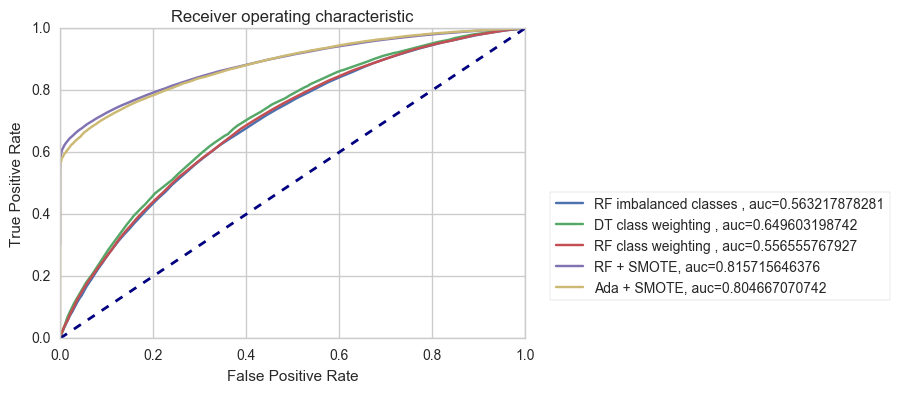

In [96]:
sns.set_style(style="whitegrid")
from sklearn import metrics

fpr, tpr, thresh = metrics.roc_curve(test_y, forest.predict_proba(test_X)[:,1])
plt.plot(fpr,tpr,label="RF imbalanced classes , auc="+str(roc_auc_score(test_y, prediction1)))

fpr, tpr, thresh = metrics.roc_curve(test_y, clf2.predict_proba(test_X)[:,1])
plt.plot(fpr,tpr,label="DT class weighting , auc="+str(score2))

fpr, tpr, thresh = metrics.roc_curve(test_y, forest_bal.predict_proba(test_X)[:,1])
plt.plot(fpr,tpr,label="RF class weighting , auc="+str(score3))

fpr, tpr, thresh = metrics.roc_curve(test_y_res, forest.predict_proba(test_X_res)[:,1])
plt.plot(fpr,tpr,label="RF + SMOTE, auc="+str(score5))

fpr, tpr, thresh = metrics.roc_curve(test_y_res, adaBoost.predict_proba(test_X_res)[:,1])
plt.plot(fpr,tpr,label="Ada + SMOTE, auc="+str(score6))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right', bbox_to_anchor=(1.8, .1) ,frameon=True)

LendingClub is a peer-to-peer lending company.  Peer-to-peer lending, sometimes abbreviated P2P lending, is the practice of lending money to individuals or businesses through online services that match lenders with borrowers. There is the risk of the borrower defaulting on the loans taken out from peer-lending websites. Lenders mitigate the risk of bad debt by choosing which borrowers to lend to, and mitigate total risk by diversifying their investments among different borrowers.
The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The true-positive rate is also known as sensitivity, recall or probability of detection in machine learning. The false-positive rate is also known as the fall-out or probability of false alarm and can be calculated as (1 − specificity). The ROC curve is thus the sensitivity as a function of fall-out. In this context it means that given the chance to miss an investment opportunity, how eﬃcient the classiﬁer is able to identify loans that are likely to default in the future.
A conservative investor might prefer a model with high recall (meaning high sensitivity to bad loans ) which means the investor would rather miss the opportunity and invest in a risky loan. AdaBoost + SMOTE model provides the best recall by far.
An aggressive investor who is willing to take more risk in order to seize every possible
opportunity is better off with the Random Forest + SMOTE model which has higher precision at the cost of lesser recall.

<a id='#skip'></a>

# Things I skipped ....

[[ go back to the top ]](#Table-of-contents)

But neither of these models can be called the 'best' models possible because I have skipped a lot of fine-tuning and optimization .This is the way it should have gone down -
I should have tried something linear (like logistic regression) as a baseline  model before moving to tree-based ensemble methods.
I used default parameters for the classifiers , should have used  pipelined the estimators and run a Grid Search to find the optimum parameters.
There are many other techniques for achieving class balance. Like Threshold manipulation, treating  the minority class as an "anomaly" and use anomaly detection algorithms.
The model can be further validated using more data from Lending-Club. 
I should have also employed a dimensionality reduction techniques (PCA)  to reduce the number of dimensions especially as the one-hot-encoding introduced a ton of  dummy variables and dimensionality just blew up.

<a id='#Acknowledgement'></a>

# Acknowledgements

[[ go back to the top ]](#Table-of-contents)
<br>
<a href="https://github.com/amueller/scipy-2016-sklearn">https://github.com/amueller/scipy-2016-sklearn</a>

<a href="http://blog.yhat.com/posts/machine-learning-for-predicting-bad-loans.html">http://blog.yhat.com/posts/machine-learning-for-predicting-bad-loans.html</a>

<a href="http://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/">http://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/</a>

<a href="https://github.com/scikit-learn-contrib/imbalanced-learn">https://github.com/scikit-learn-contrib/imbalanced-learn</a>

<a href="https://www.analyticsvidhya.com/blog/2017/03/imbalanced-classification-problem/">https://www.analyticsvidhya.com/blog/2017/03/imbalanced-classification-problem/</a>

<a href="http://joeywhelan.blogspot.com/2016/05/ai-driven-investing-with-lending-club-p1.html">http://joeywhelan.blogspot.com/2016/05/ai-driven-investing-with-lending-club-p1.html</a>

<a href="http://www.wujiayu.me/assets/projects/loan-default-prediction-Jiayu-Wu.pdf">http://www.wujiayu.me/assets/projects/loan-default-prediction-Jiayu-Wu.pdf</a>

<br>
